Objective:
To forecast the impact of the 'Eldrebølgen' (Aging Wave) on the demand for Sykepleier, Helsefagarbeider, and Hjelpepleier across Norway's regions.

Research Question:
How is the 'Eldrebølgen' expected to affect the demand for these healthcare professions in different regions of Norway?

Why Sykepleier, Helsefagarbeider, and Hjelpepleier?


Helsefagarbeider, Sykepleier, and Hjelpepleier are chosen for their pivotal roles in providing comprehensive, frontline care, especially to the elderly who are the most frequent users of healthcare services. Their versatility, accessibility, and foundational presence in the healthcare system make them critical in addressing the challenges posed by the 'Eldrebølgen'. Focusing on these professions provides valuable insights into the overall preparedness of the healthcare system to meet the rising demand and ensures that the quality of care for the aging population is maintained.

The research objective and question are pivotal in preparing for the inevitable challenges associated with the 'Eldrebølgen'. By anticipating changes in healthcare demand, Norway can proactively address potential shortages in healthcare staffing and ensure that the needs of its aging population are met.

Answering the So What?:


The necessity to address the demand for Helsefagarbeider, Sykepleier, and Hjelpepleier in anticipation of Norway's 'Eldrebølgen' is primarily a practical concern with far-reaching implications. The "so what?" factor lies in the tangible outcomes of this issue on our healthcare system and society at large.

The importance of these professions transcends their job descriptions; they are crucial in maintaining the quality of care for the elderly population. Adequately meeting the demand for these roles is essential for the sustainability of our healthcare services. A shortfall in these critical areas could result in strained healthcare resources, decreased quality of care, and potentially higher healthcare expenses.

Furthermore, the issue carries significant ethical weight. Providing sufficient care for the elderly is a societal responsibility and reflects our commitment to ensuring their well-being. The focus on Helsefagarbeider, Sykepleier, and Hjelpepleier is indicative of our societal resolve to support and care for our aging population. Essentially, the “so what?” is about pragmatic foresight. It's about recognizing and addressing the upcoming demographic changes proactively to ensure that our healthcare system remains robust and responsive to the needs of all citizens, especially the most vulnerable.






In [30]:
# Data processing and analysis
import pandas as pd
import numpy as np

# Plotting and visualization
import matplotlib.pyplot as plt

# Statistical modeling
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Machine Learning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


# Load the CSV file, skip initial rows if necessary, and specify the delimiter
data = pd.read_csv('/Users/lime/Desktop/Helse50.csv', delimiter=';', skiprows=1, header=1)


# Display the first few rows of the dataframe
data.head()


,K.3001 Halden,Hjelpepleier,Alle aldre,Fylkeskommunal forvaltning,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,0.0.10,0.0.11,0.0.12,0.0.13,0.0.14
0,K.3001 Halden,Hjelpepleier,Alle aldre,Statsforvaltningen,6.0,28.0,22.0,22.0,22.0,27.0,27.0,24.0,26.0,27.0,20.0,17.0,22.0,22.0,12.0
1,K.3001 Halden,Hjelpepleier,Alle aldre,Privat sektor og offentlige foretak,22.0,20.0,22.0,25.0,25.0,25.0,29.0,23.0,22.0,24.0,25.0,23.0,26.0,24.0,12.0
2,K.3001 Halden,Hjelpepleier,Alle aldre,Uoppgitt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,K.3001 Halden,Helsefagarbeider,Alle aldre,Kommuneforvaltningen,0.0,140.5,10.0,23.0,31.0,84.0,124.0,128.0,153.0,169.0,169.0,191.0,214.0,240.0,262.0
4,K.3001 Halden,Helsefagarbeider,Alle aldre,Fylkeskommunal forvaltning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Helse 50 contains 

In [31]:
print("Current columns in the DataFrame:", data.columns)
print("First few rows of the DataFrame:")
print(data.head())

Current columns in the DataFrame: Index(['K.3001 Halden', 'Hjelpepleier', 'Alle aldre',
       'Fylkeskommunal forvaltning', '0.0', '0.0.1', '0.0.2', '0.0.3', '0.0.4',
       '0.0.5', '0.0.6', '0.0.7', '0.0.8', '0.0.9', '0.0.10', '0.0.11',
       '0.0.12', '0.0.13', '0.0.14'],
      dtype='object')
First few rows of the DataFrame:
   K.3001 Halden      Hjelpepleier  Alle aldre  \
0  K.3001 Halden      Hjelpepleier  Alle aldre   
1  K.3001 Halden      Hjelpepleier  Alle aldre   
2  K.3001 Halden      Hjelpepleier  Alle aldre   
3  K.3001 Halden  Helsefagarbeider  Alle aldre   
4  K.3001 Halden  Helsefagarbeider  Alle aldre   

            Fylkeskommunal forvaltning   0.0  0.0.1  0.0.2  0.0.3  0.0.4  \
0                   Statsforvaltningen   6.0   28.0   22.0   22.0   22.0   
1  Privat sektor og offentlige foretak  22.0   20.0   22.0   25.0   25.0   
2                             Uoppgitt   0.0    0.0    0.0    0.0    0.0   
3                 Kommuneforvaltningen   0.0  140.5   10.0   2

In [32]:

# Define the correct column headers after dropping the unnecessary columns
correct_headers = [
     "region", "fagutdanning", "alder", "sektor" , "2008", "2009", "2010",
    "2011", "2012", "2013", "2014", "2015", "2016", "2017",
    "2018", "2019", "2020", "2021", "2022"
]

# Update the dataframe with the correct headers
data.columns = correct_headers

# Now your DataFrame 'data' has the correct headers and you can work with it as needed
# Here's how you can view the first few rows to confirm
data.head()

,region,fagutdanning,alder,sektor,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,K.3001 Halden,Hjelpepleier,Alle aldre,Statsforvaltningen,6.0,28.0,22.0,22.0,22.0,27.0,27.0,24.0,26.0,27.0,20.0,17.0,22.0,22.0,12.0
1,K.3001 Halden,Hjelpepleier,Alle aldre,Privat sektor og offentlige foretak,22.0,20.0,22.0,25.0,25.0,25.0,29.0,23.0,22.0,24.0,25.0,23.0,26.0,24.0,12.0
2,K.3001 Halden,Hjelpepleier,Alle aldre,Uoppgitt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,K.3001 Halden,Helsefagarbeider,Alle aldre,Kommuneforvaltningen,0.0,140.5,10.0,23.0,31.0,84.0,124.0,128.0,153.0,169.0,169.0,191.0,214.0,240.0,262.0
4,K.3001 Halden,Helsefagarbeider,Alle aldre,Fylkeskommunal forvaltning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There were no headers, so they had to be made

In [33]:
print(data.columns)

Index(['region', 'fagutdanning', 'alder', 'sektor', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')


In [34]:
data = data.drop([ 'alder'], axis=1)

# Now, display the first few rows of the updated dataframe
data.head()

,region,fagutdanning,sektor,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,K.3001 Halden,Hjelpepleier,Statsforvaltningen,6.0,28.0,22.0,22.0,22.0,27.0,27.0,24.0,26.0,27.0,20.0,17.0,22.0,22.0,12.0
1,K.3001 Halden,Hjelpepleier,Privat sektor og offentlige foretak,22.0,20.0,22.0,25.0,25.0,25.0,29.0,23.0,22.0,24.0,25.0,23.0,26.0,24.0,12.0
2,K.3001 Halden,Hjelpepleier,Uoppgitt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,K.3001 Halden,Helsefagarbeider,Kommuneforvaltningen,0.0,140.5,10.0,23.0,31.0,84.0,124.0,128.0,153.0,169.0,169.0,191.0,214.0,240.0,262.0
4,K.3001 Halden,Helsefagarbeider,Fylkeskommunal forvaltning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Alder was dropped because we were not interested in the age of the workforce, we simply wanted the total amount of "sysselsatte" within that profession

In [35]:
print(data.columns)

Index(['region', 'fagutdanning', 'sektor', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')


In [36]:
year_columns = [str(year) for year in range(2008, 2023)]
data[year_columns] = data[year_columns].apply(pd.to_numeric, errors='coerce')

# Drop the 'sektor' column if it exists
if 'sektor' in data.columns:
    data = data.drop(columns='sektor')

# Now group by 'region' and 'fagutdanning' and sum the numeric columns
summary_data = data.groupby(['region', 'fagutdanning'])[year_columns].sum().reset_index()

# The resulting 'summary_data' DataFrame should now be summarized without the 'sektor' column
summary_data.head()

,region,fagutdanning,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,K.0301 Oslo,Helsefagarbeider,0.0,830.5,112.0,361.0,585.0,930.0,1243.0,1508.0,1787.0,2107.0,2234.0,2540.0,1904.0,2000.0,3103.0
1,K.0301 Oslo,Hjelpepleier,4837.0,4900.0,4716.0,4572.0,4322.0,4058.0,3866.0,3585.0,3397.0,3198.0,2950.0,2759.0,3157.0,3103.0,2189.0
2,K.0301 Oslo,Lege med spesialitet,2282.0,2404.0,2455.0,2437.0,2333.0,2342.0,2467.0,2500.0,2573.0,2815.0,2893.0,2989.0,3095.0,3145.0,3365.0
3,K.0301 Oslo,Lege uten spesialitet,1607.0,1775.0,1795.0,1725.0,1670.0,1677.0,1804.0,1855.0,1891.0,1846.0,1932.0,2011.0,1985.0,1981.0,2100.0
4,K.0301 Oslo,Omsorgsarbeider,452.0,446.0,420.0,418.0,386.0,383.0,359.0,343.0,310.0,301.0,272.0,258.0,336.0,338.0,218.0


Summarize the sector columns because we didnt care about private or public sector, then by different years

In [37]:
data['fagutdanning'] = data['fagutdanning'].replace({
    'Lege med spesialitet': 'Lege',
    'Lege uten spesialitet': 'Lege'
})

# Now group by 'region' and 'fagutdanning' and sum the numeric columns
summary_data = data.groupby(['region', 'fagutdanning']).sum().reset_index()

# The resulting 'summary_data' DataFrame contains the combined 'Lege' category
summary_data.head()

,region,fagutdanning,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,K.0301 Oslo,Helsefagarbeider,0.0,830.5,112.0,361.0,585.0,930.0,1243.0,1508.0,1787.0,2107.0,2234.0,2540.0,1904.0,2000.0,3103.0
1,K.0301 Oslo,Hjelpepleier,4837.0,4900.0,4716.0,4572.0,4322.0,4058.0,3866.0,3585.0,3397.0,3198.0,2950.0,2759.0,3157.0,3103.0,2189.0
2,K.0301 Oslo,Lege,3889.0,4179.0,4250.0,4162.0,4003.0,4019.0,4271.0,4355.0,4464.0,4661.0,4825.0,5000.0,5080.0,5126.0,5465.0
3,K.0301 Oslo,Omsorgsarbeider,452.0,446.0,420.0,418.0,386.0,383.0,359.0,343.0,310.0,301.0,272.0,258.0,336.0,338.0,218.0
4,K.0301 Oslo,Sykepleier,10061.0,10550.0,10912.0,10859.0,10757.0,10800.0,11315.0,11812.0,12008.0,12207.0,12278.0,12559.0,12093.0,12239.0,13215.0


Lege with specialty and lege without was combined into just lege

In [38]:
# Drop rows where 'fagutdanning' is 'Hjelpepleier'
data_filtered = data[data['fagutdanning'] != 'Hjelpepleier']

# Now group by 'region' and 'fagutdanning' and sum the numeric columns
summary_data = data_filtered.groupby(['region', 'fagutdanning']).sum().reset_index()

# Display the first few rows of the resulting 'summary_data' DataFrame
summary_data.head()


,region,fagutdanning,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,K.0301 Oslo,Helsefagarbeider,0.0,830.5,112.0,361.0,585.0,930.0,1243.0,1508.0,1787.0,2107.0,2234.0,2540.0,1904.0,2000.0,3103.0
1,K.0301 Oslo,Lege,3889.0,4179.0,4250.0,4162.0,4003.0,4019.0,4271.0,4355.0,4464.0,4661.0,4825.0,5000.0,5080.0,5126.0,5465.0
2,K.0301 Oslo,Omsorgsarbeider,452.0,446.0,420.0,418.0,386.0,383.0,359.0,343.0,310.0,301.0,272.0,258.0,336.0,338.0,218.0
3,K.0301 Oslo,Sykepleier,10061.0,10550.0,10912.0,10859.0,10757.0,10800.0,11315.0,11812.0,12008.0,12207.0,12278.0,12559.0,12093.0,12239.0,13215.0
4,K.1103 Stavanger,Helsefagarbeider,0.0,589.0,595.0,531.0,550.0,294.0,444.0,562.0,673.0,746.0,808.0,881.0,970.0,1077.0,1173.0


Removed hjelpepleier because it has been merged with helsefagarbeider


In [39]:
melted_data = summary_data.melt(id_vars=['region', 'fagutdanning'], var_name='Year', value_name='Value')

# Select 5 random regions
random_regions = np.random.choice(melted_data['region'].unique(), size=5, replace=False)
print(random_regions)

['K.4624 Bjørnafjorden' 'K.3807 Skien' 'K.5402 Harstad' 'K.1506 Molde'
 'K.3802 Holmestrand']


To select 5 regions to plot afterwards

In [40]:
plot_data = melted_data[melted_data['region'].isin(random_regions)]


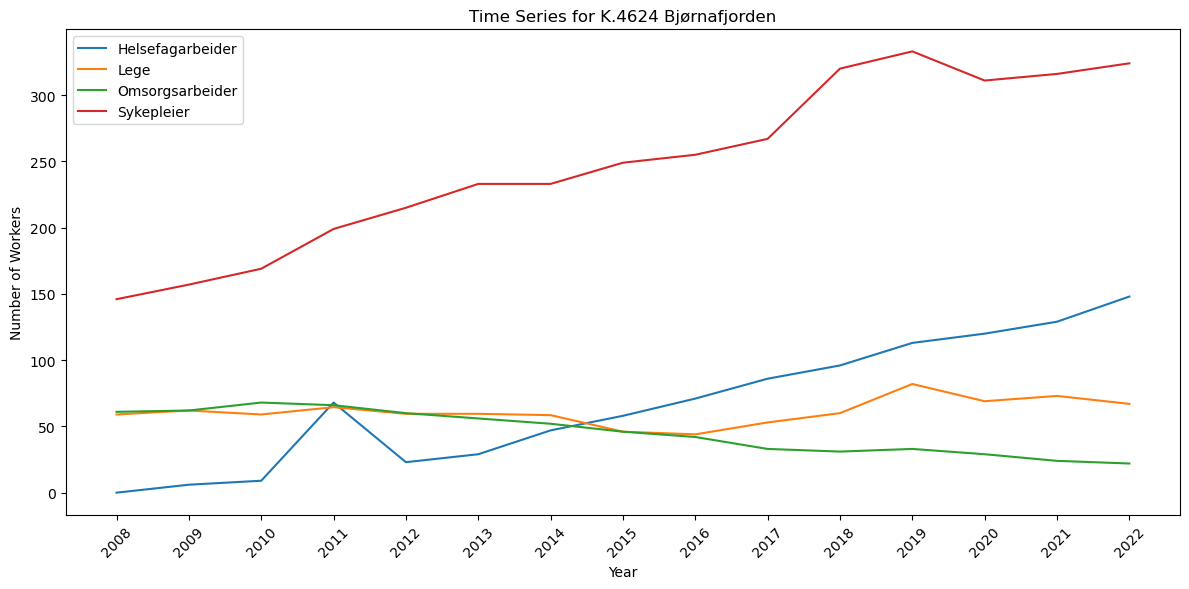

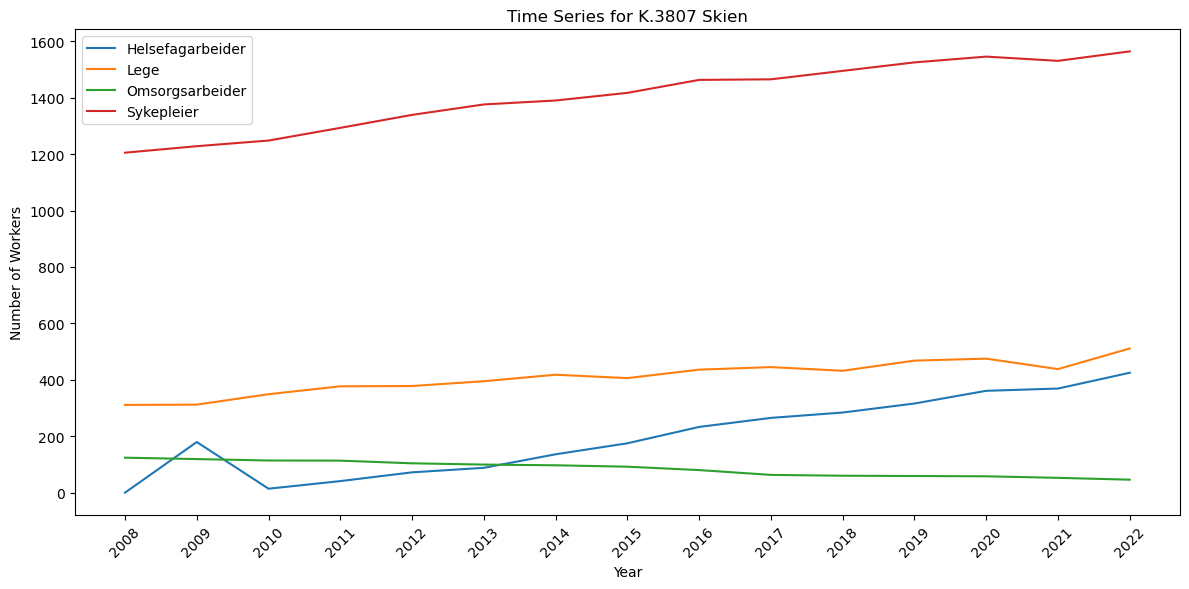

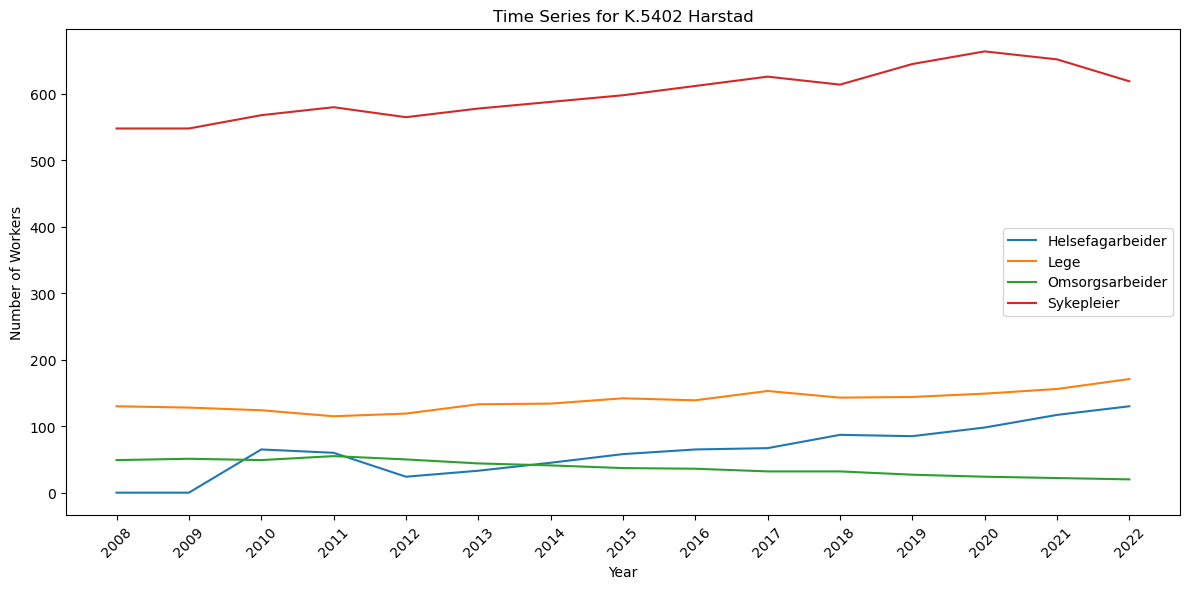

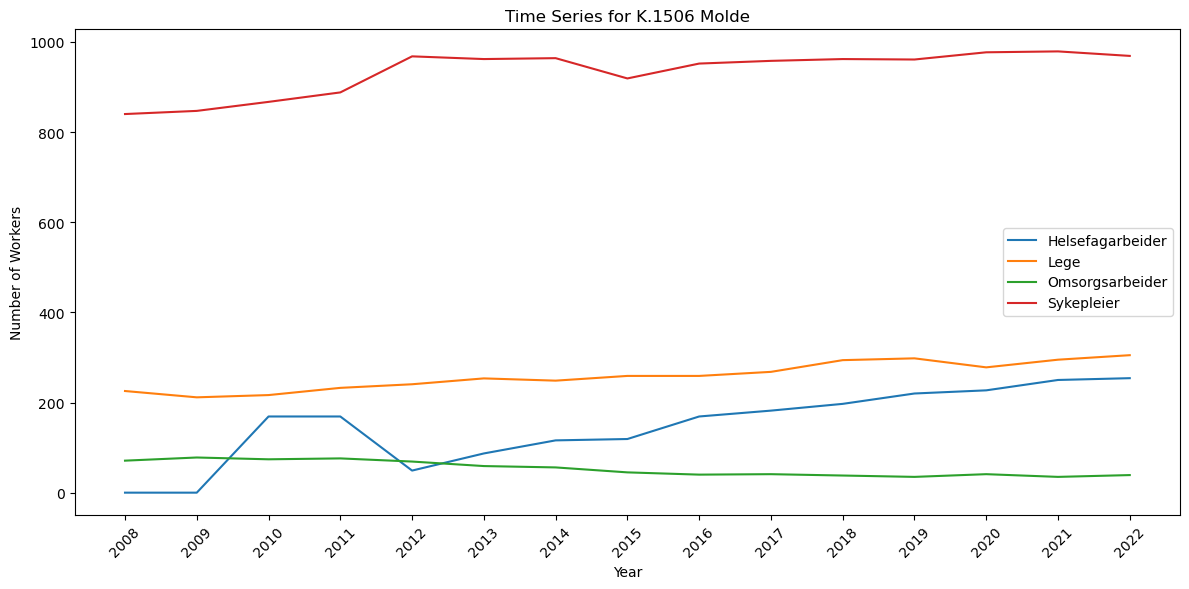

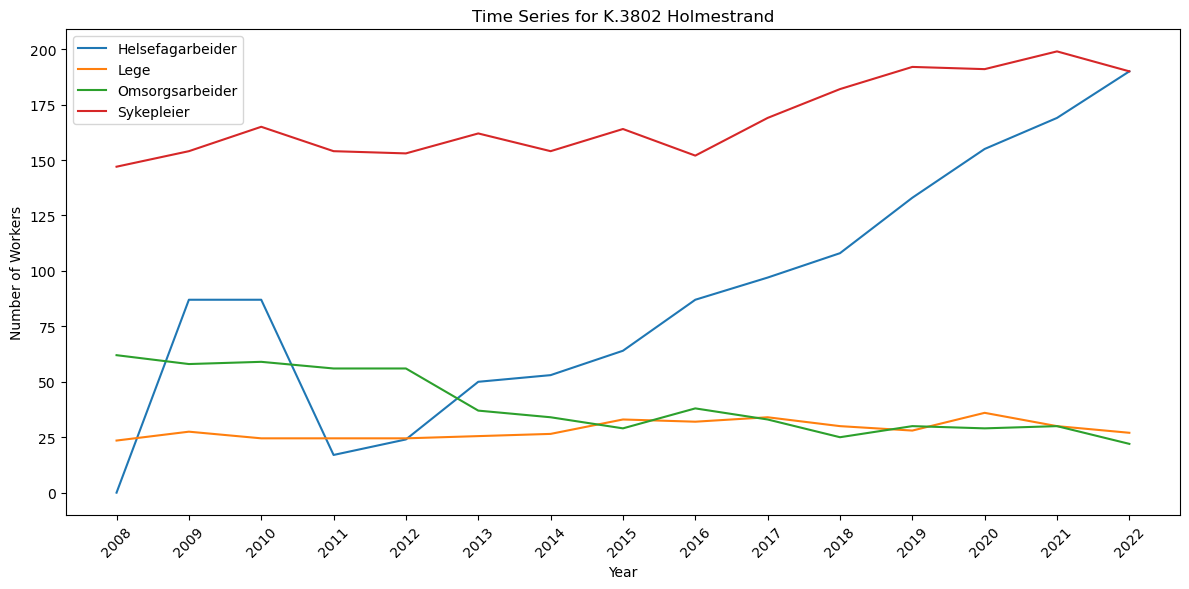

In [41]:
for region in random_regions:
    plt.figure(figsize=(12, 6))
    region_data = plot_data[plot_data['region'] == region]
    for fagutdanning in region_data['fagutdanning'].unique():
        subset = region_data[region_data['fagutdanning'] == fagutdanning]
        plt.plot(subset['Year'], subset['Value'], label=fagutdanning)
    
    plt.title(f'Time Series for {region}')
    plt.xlabel('Year')
    plt.ylabel('Number of Workers')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

The plots were made in order to get an idea/ a visualization of how the data actually looked like historically. Some graphs had significant drops one year, which made it difficult to use linear regression with

In [42]:
aggregated_data = data.groupby(['region', 'fagutdanning']).sum().reset_index()

# Assuming that '2020' and '2019' are columns in your aggregated_data DataFrame
# Calculate the difference between the years 2020 and 2019 for each 'region'
aggregated_data['Difference_2020_2019'] = aggregated_data['2020'] - aggregated_data['2019']

# Calculate the percentage change
aggregated_data['Percentage_Change'] = (aggregated_data['Difference_2020_2019'] / aggregated_data['2019']) * 100

# Find 'region's with a significant drop and sort them
significant_drop_kommunes = aggregated_data[aggregated_data['Difference_2020_2019'] < 0]
significant_drop_kommunes = significant_drop_kommunes.sort_values('Percentage_Change')

# Display the 'region's with the most significant drops in percentage
significant_drop_kommunes[['region', 'Percentage_Change']]

,region,Percentage_Change
148,K.3405 Lillehammer,-30.000000
110,K.3029 Lørenskog,-29.629630
27,K.1149 Karmøy,-25.531915
0,K.0301 Oslo,-25.039370
92,K.3014 Indre Østfold,-24.242424
...,...,...
179,K.3804 Sandefjord,-0.662252
169,K.3802 Holmestrand,-0.520833
19,K.1108 Sandnes,-0.429799
209,K.4204 Kristiansand,-0.065217


In [ ]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter for Lillehammer and a specific job category, e.g., 'Helsefagarbeider'
oslo_data = melted_data[(melted_data['region'] == 'K.0301 Oslo') & (melted_data['fagutdanning'] == 'Omsorgsarbeider')]

# Convert 'Year' to numeric
oslo_data['Year_Num'] = oslo_data['Year'].astype(int)

# Linear regression model
model = LinearRegression()
model.fit(oslo_data[['Year_Num']], oslo_data['Value'])

# Predicting for both existing years and future years
# Assuming you want to predict for the next 5 years
future_years = np.arange(oslo_data['Year_Num'].max() + 1, oslo_data['Year_Num'].max() + 6)
all_years = np.concatenate([oslo_data['Year_Num'], future_years])
predictions = model.predict(all_years.reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
# Actual data
plt.scatter(oslo_data['Year_Num'], oslo_data['Value'], color='blue', label='Actual Data')
# Regression line (including predictions)
plt.plot(all_years, predictions, color='red', label='Regression Line')

plt.title('Healthcare Worker Linear Regression Model for Oslo (Omsorgsarbeider)')
plt.xlabel('Year')
plt.ylabel('Number of Healthcare Workers')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/dg/64b0p1yx17dgtv62qtpnxhm00000gn/T/ipykernel_10402/2428729018.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oslo_data['Year_Num'] = oslo_data['Year'].astype(int)
/Users/lime/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


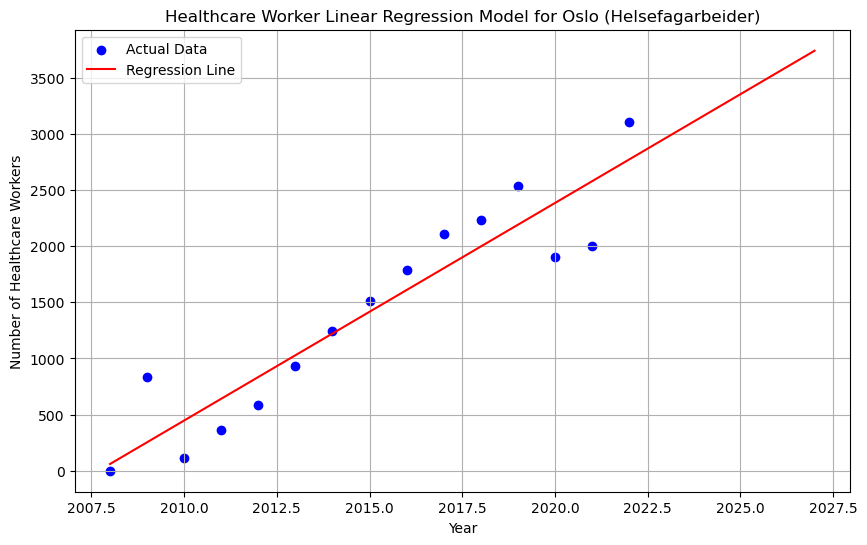

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter for Lillehammer and a specific job category, e.g., 'Helsefagarbeider'
oslo_data = melted_data[(melted_data['region'] == 'K.0301 Oslo') & (melted_data['fagutdanning'] == 'Helsefagarbeider')]

# Convert 'Year' to numeric
oslo_data['Year_Num'] = oslo_data['Year'].astype(int)

# Linear regression model
model = LinearRegression()
model.fit(oslo_data[['Year_Num']], oslo_data['Value'])

# Predicting for both existing years and future years
# Assuming you want to predict for the next 5 years
future_years = np.arange(oslo_data['Year_Num'].max() + 1, oslo_data['Year_Num'].max() + 6)
all_years = np.concatenate([oslo_data['Year_Num'], future_years])
predictions = model.predict(all_years.reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
# Actual data
plt.scatter(oslo_data['Year_Num'], oslo_data['Value'], color='blue', label='Actual Data')
# Regression line (including predictions)
plt.plot(all_years, predictions, color='red', label='Regression Line')

plt.title('Healthcare Worker Linear Regression Model for Oslo (Helsefagarbeider)')
plt.xlabel('Year')
plt.ylabel('Number of Healthcare Workers')
plt.legend()
plt.grid(True)
plt.show()


The two graphs shows that omsorgsarbeider is becoming less and less because it merge into helsefagarbeider. Helsefagarbeider is a new term that is just becoming bigger and bigger.

This was done in order to find the regions with the biggest drop in workforce when covid took place. The drop took place, when helsefagarbeider included hjelpefagarbeider therefor it is a different drop regions than what we used. We removed hjelpefagarbeider from helsefagarbeider because when we merged the data it was difficult to make good models. 

In [45]:
# Find regions with a significant drop (less than -7.5%)
regions_to_drop = significant_drop_kommunes[significant_drop_kommunes['Percentage_Change'] <= -7.5]['region'].unique()




# Dropping these regions from 'summary_data'
summary_data_dropped = summary_data[~summary_data['region'].isin(regions_to_drop)]


print("Regions before drop:", summary_data['region'].nunique())
print("Regions after drop:", summary_data_dropped['region'].nunique())


Regions before drop: 52
Regions after drop: 14


Because using the regions with a drop at the start of covid made it hard for us to use a linear regression model, we decided to simply move forward with those regions which were seemingly unaffected, number wise, in its workforce

In [46]:
unique_regions_left = summary_data_dropped['region'].unique()
print(unique_regions_left)


['K.1506 Molde' 'K.1833 Rana' 'K.1875 Hamarøy' 'K.3002 Moss'
 'K.3003 Sarpsborg' 'K.3004 Fredrikstad' 'K.3030 Lillestrøm'
 'K.3033 Ullensaker' 'K.3407 Gjøvik' 'K.3803 Tønsberg' 'K.3806 Porsgrunn'
 'K.3807 Skien' 'K.4204 Kristiansand' 'K.5001 Trondheim - Tråante']


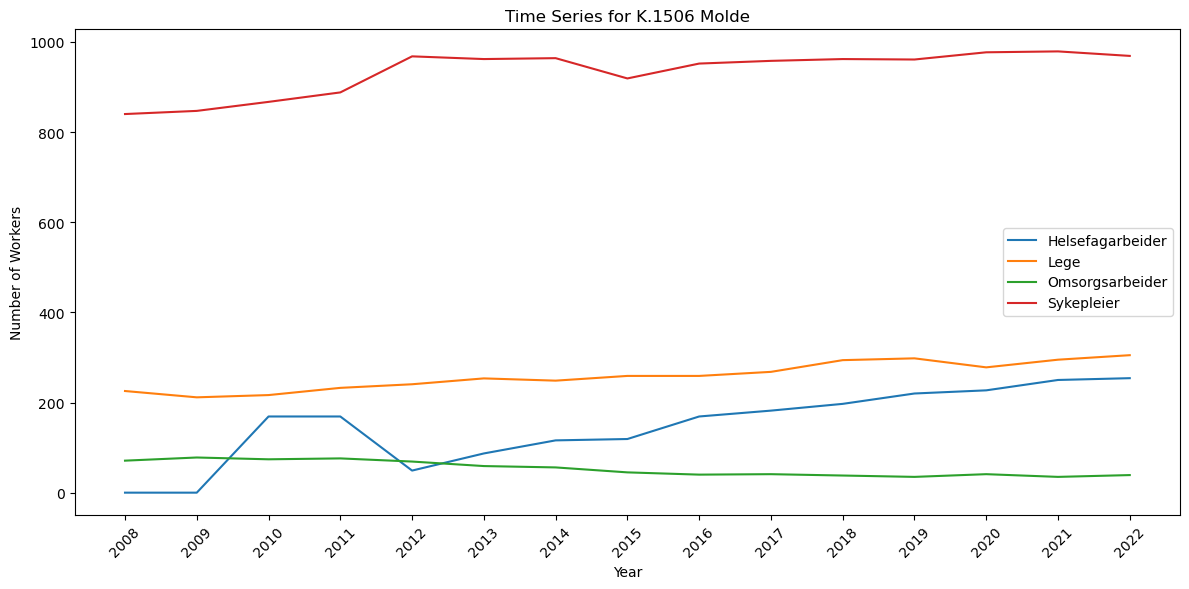

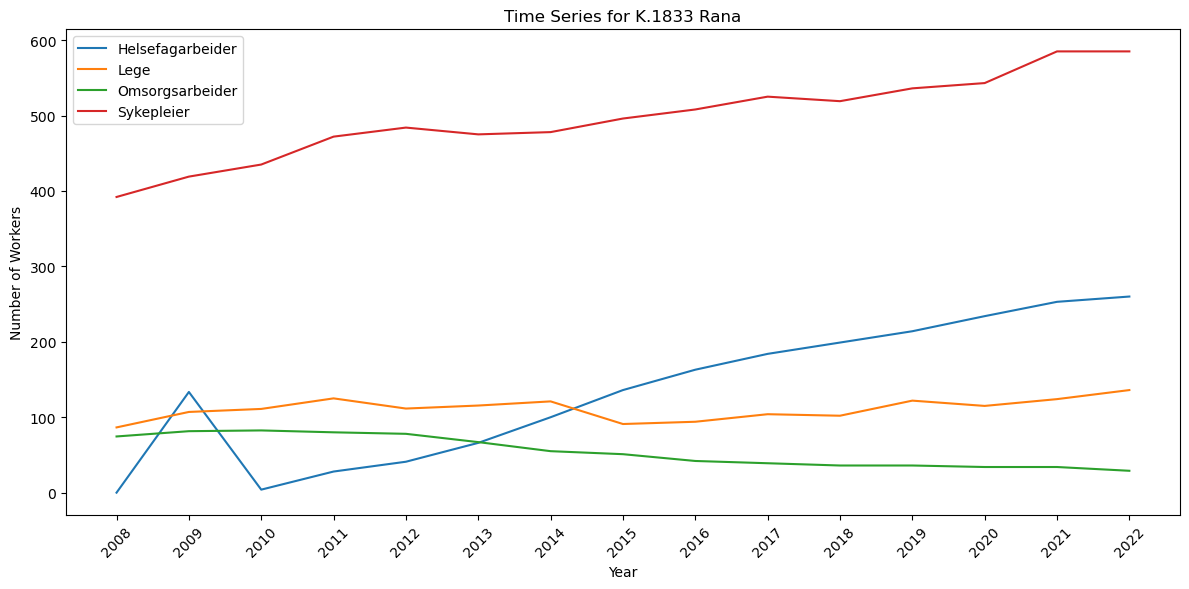

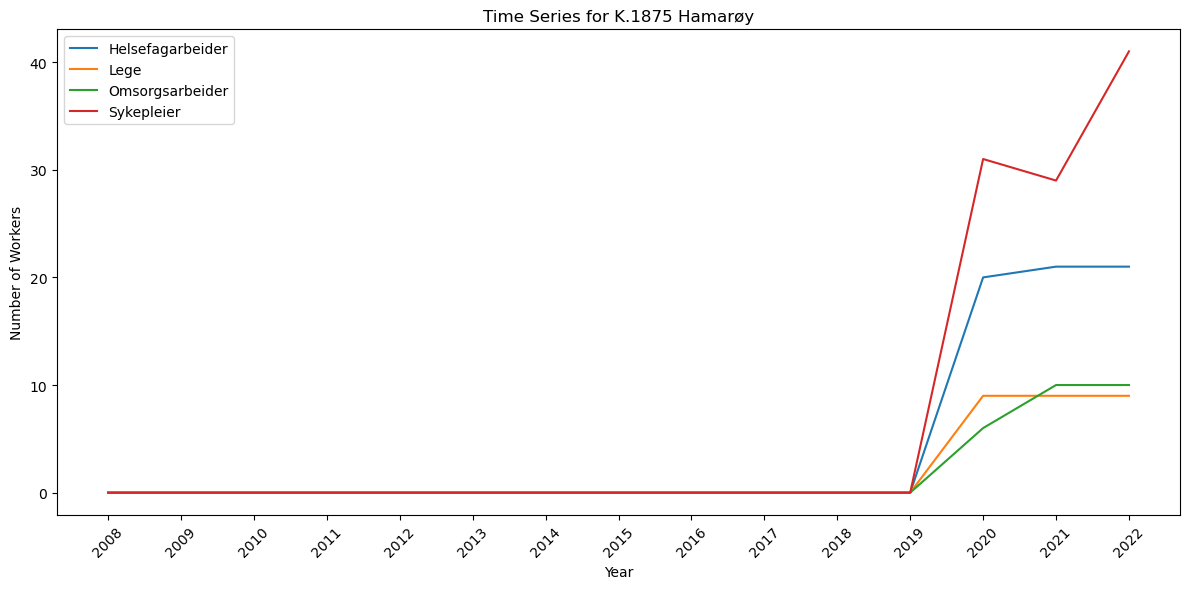

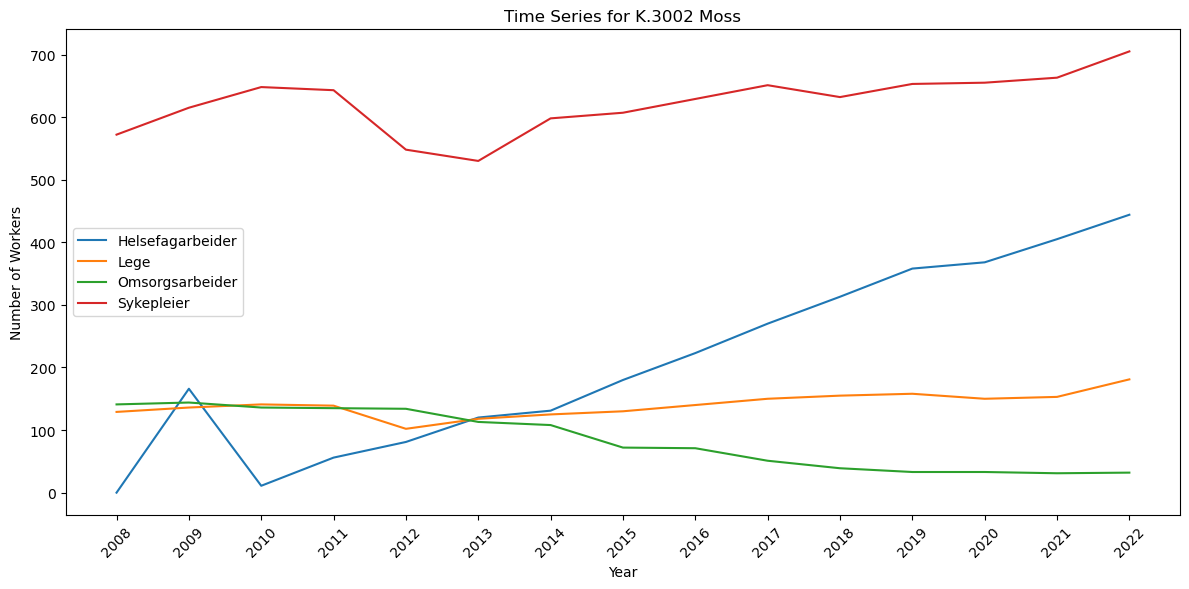

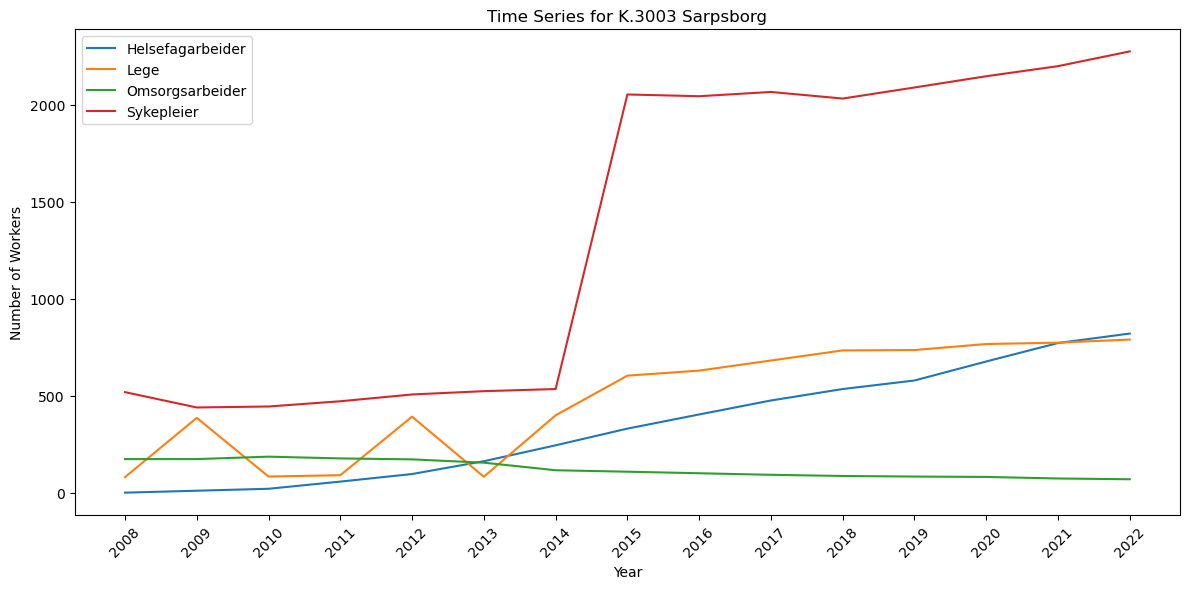

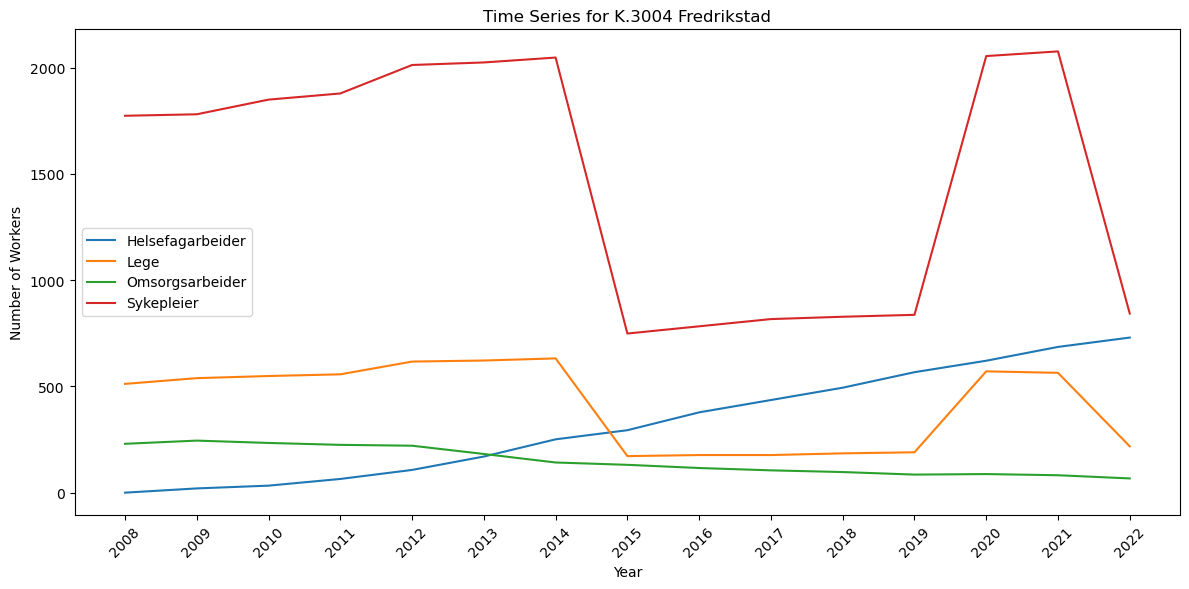

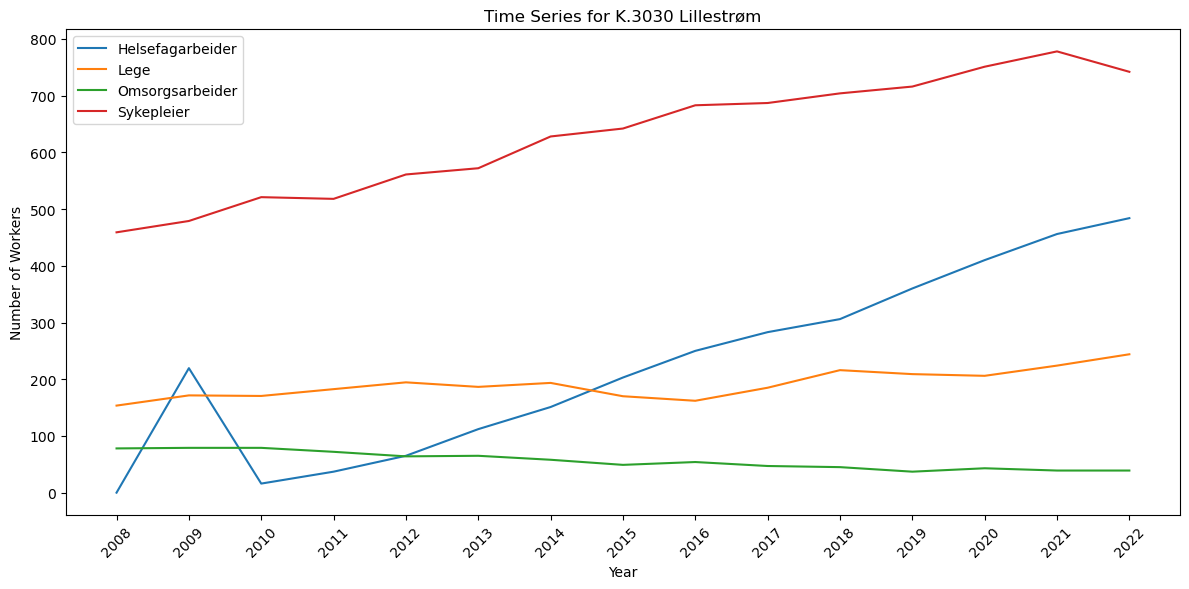

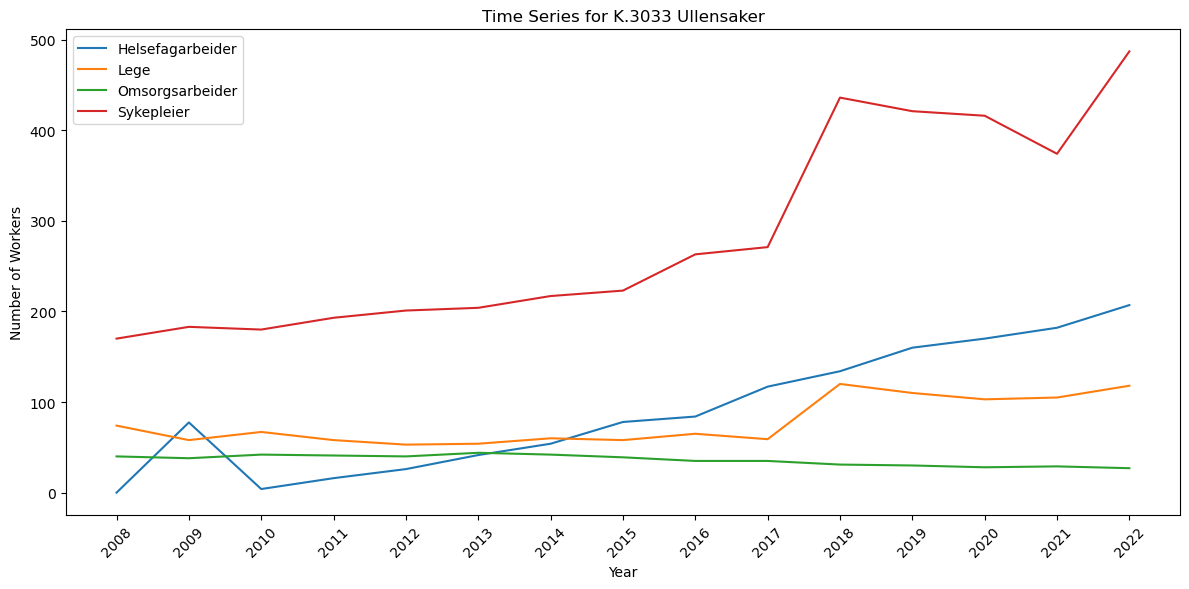

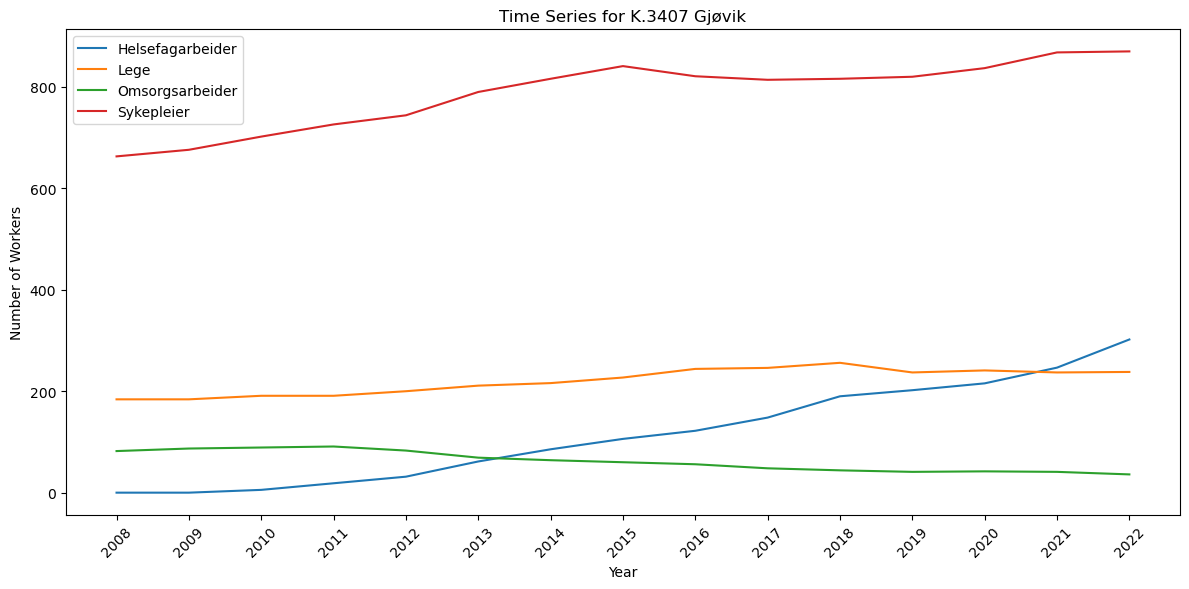

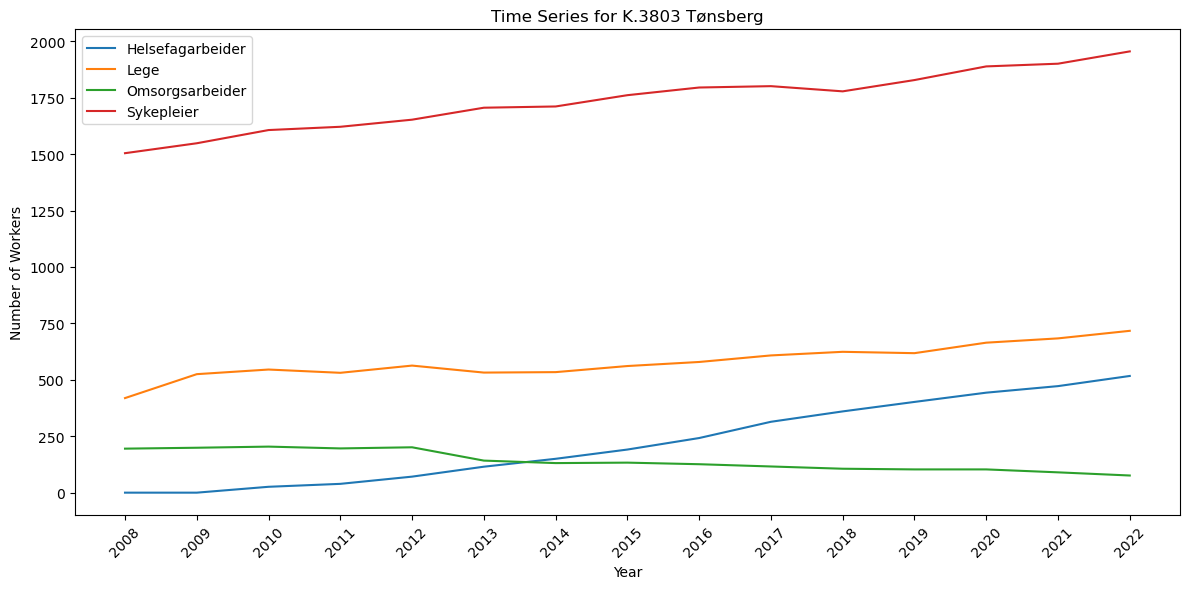

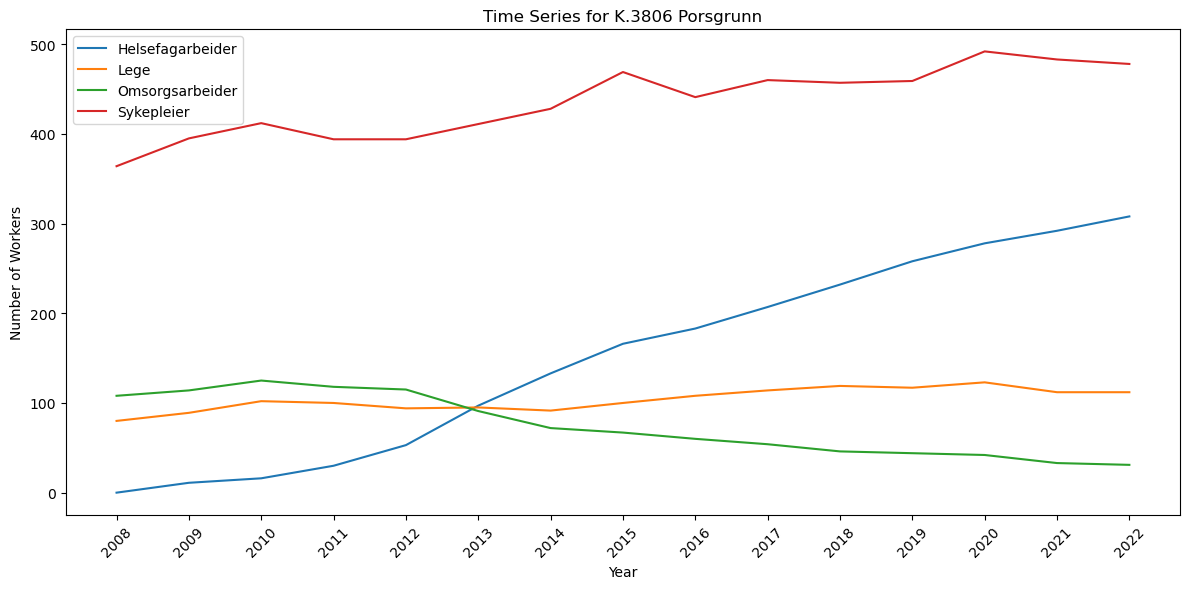

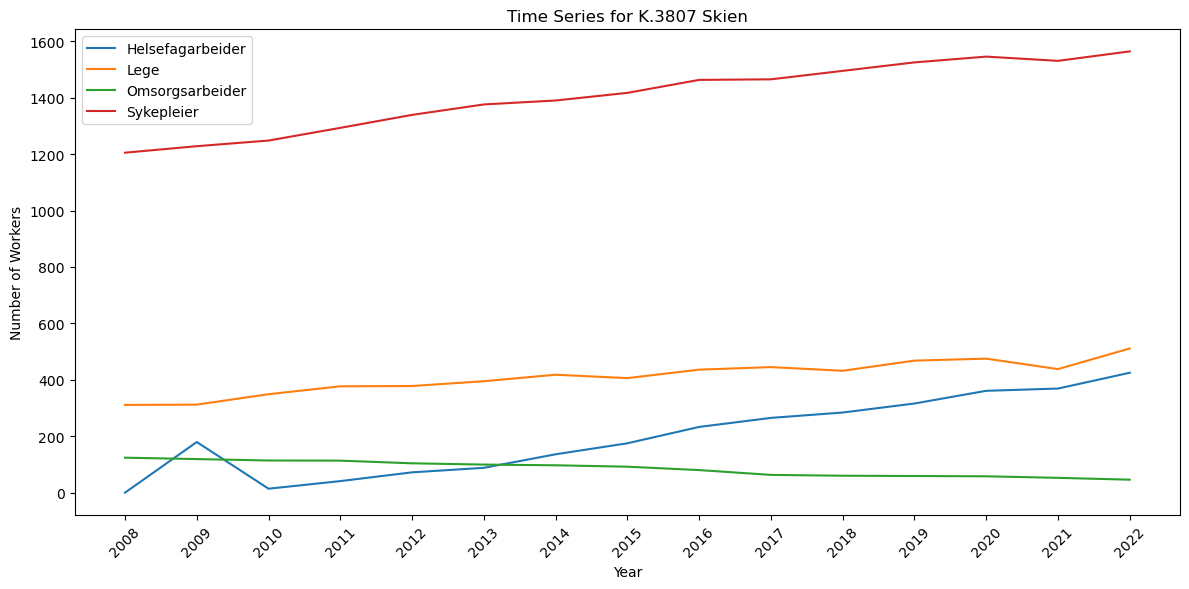

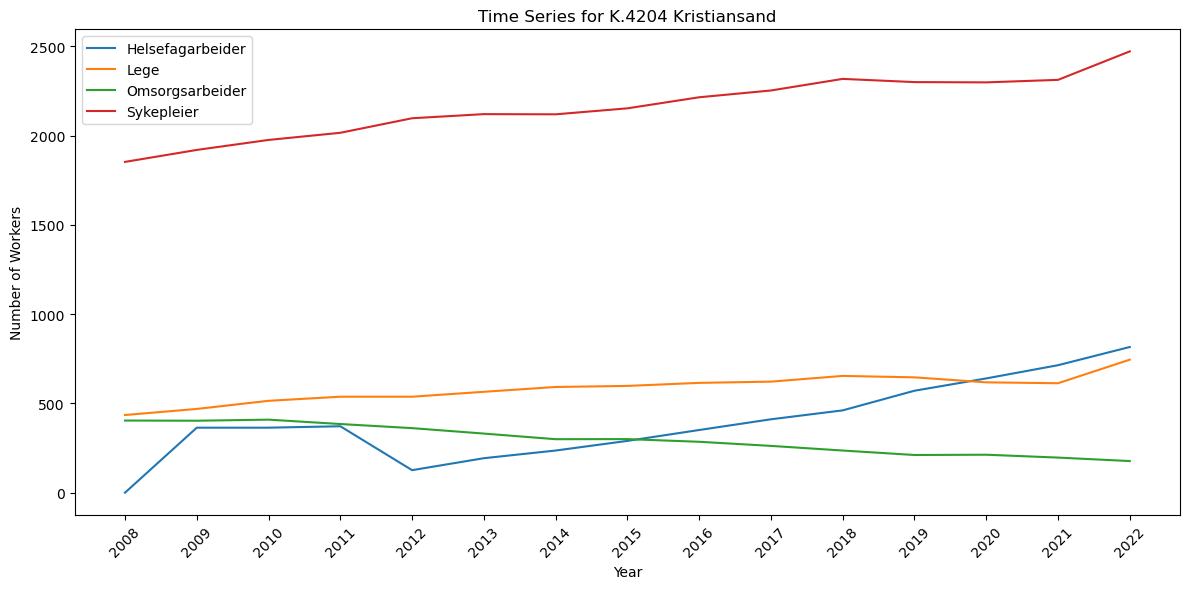

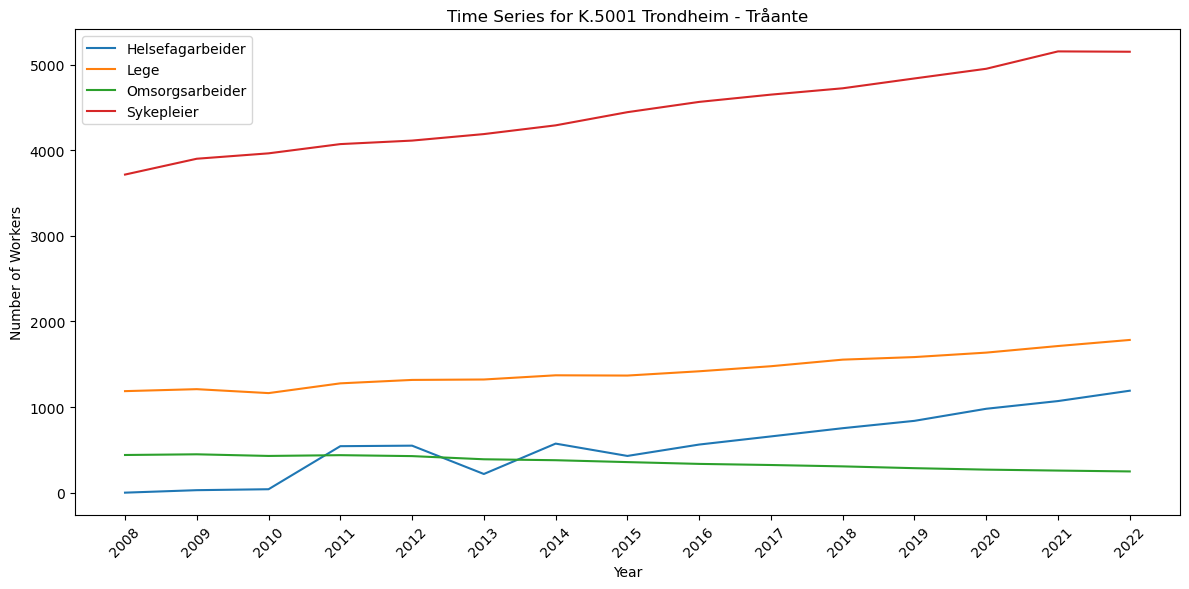

In [47]:
reshaped_data = summary_data_dropped.melt(id_vars=['region', 'fagutdanning'], var_name='Year', value_name='Value')
for region in unique_regions_left:
    plt.figure(figsize=(12, 6))
    region_subset = reshaped_data[reshaped_data['region'] == region]
    for fagutdanning in region_subset['fagutdanning'].unique():
        subset = region_subset[region_subset['fagutdanning'] == fagutdanning]
        plt.plot(subset['Year'], subset['Value'], label=fagutdanning)

    plt.title(f'Time Series for {region}')
    plt.xlabel('Year')
    plt.ylabel('Number of Workers')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Every region without a significant drop was plot for the same reason as before, to peek inside the data

In [48]:
regions_to_keep = [
    'K.0301 Oslo', 'K.1103 Stavanger', 'K.1106 Haugesund', 'K.1506 Molde',
    'K.1833 Rana', 'K.3002 Moss', 'K.3005 Drammen', 'K.3007 Ringerike',
    'K.3029 Lørenskog', 'K.3030 Lillestrøm', 'K.3033 Ullensaker', 'K.3407 Gjøvik',
    'K.3802 Holmestrand', 'K.3803 Tønsberg', 'K.3806 Porsgrunn', 'K.3807 Skien',
    'K.4204 Kristiansand', 'K.4601 Bergen', 'K.5001 Trondheim - Tråante', 'K.5401 Tromsø'
]

# Filter the DataFrame
summary_data_filtered = summary_data[summary_data['region'].isin(regions_to_keep)]

# Display the filtered DataFrame
print(summary_data_filtered.head())


             region      fagutdanning     2008     2009     2010     2011  \
0       K.0301 Oslo  Helsefagarbeider      0.0    830.5    112.0    361.0   
1       K.0301 Oslo              Lege   3889.0   4179.0   4250.0   4162.0   
2       K.0301 Oslo   Omsorgsarbeider    452.0    446.0    420.0    418.0   
3       K.0301 Oslo        Sykepleier  10061.0  10550.0  10912.0  10859.0   
4  K.1103 Stavanger  Helsefagarbeider      0.0    589.0    595.0    531.0   

      2012     2013     2014     2015     2016     2017     2018     2019  \
0    585.0    930.0   1243.0   1508.0   1787.0   2107.0   2234.0   2540.0   
1   4003.0   4019.0   4271.0   4355.0   4464.0   4661.0   4825.0   5000.0   
2    386.0    383.0    359.0    343.0    310.0    301.0    272.0    258.0   
3  10757.0  10800.0  11315.0  11812.0  12008.0  12207.0  12278.0  12559.0   
4    550.0    294.0    444.0    562.0    673.0    746.0    808.0    881.0   

      2020     2021     2022  
0   1904.0   2000.0   3103.0  
1   5080.0  

Now we are saving all the regions and their workforce totals into the same dataframe

In [49]:


# Print unique regions and professions after filtering
print("\nUnique regions:", summary_data_filtered['region'].unique())
print("Unique fagutdanning:", summary_data_filtered['fagutdanning'].unique())



print("Original DataFrame columns:", summary_data_filtered.columns)

# Check if year columns are correctly named (2008 to 2022)
year_columns = [str(year) for year in range(2008, 2023)]
print("Year columns to be melted:", year_columns)

# Perform the melting process
melted_data_filtered_corrected = summary_data_filtered.melt(id_vars=['region', 'fagutdanning'], 
                                                            value_vars=year_columns,
                                                            var_name='Year', 
                                                            value_name='Workforce')

# Convert 'Year' column to the correct data type if needed
melted_data_filtered_corrected['Year'] = pd.to_numeric(melted_data_filtered_corrected['Year'])




Unique regions: ['K.0301 Oslo' 'K.1103 Stavanger' 'K.1106 Haugesund' 'K.1506 Molde'
 'K.1833 Rana' 'K.3002 Moss' 'K.3005 Drammen' 'K.3007 Ringerike'
 'K.3029 Lørenskog' 'K.3030 Lillestrøm' 'K.3033 Ullensaker'
 'K.3407 Gjøvik' 'K.3802 Holmestrand' 'K.3803 Tønsberg' 'K.3806 Porsgrunn'
 'K.3807 Skien' 'K.4204 Kristiansand' 'K.4601 Bergen'
 'K.5001 Trondheim - Tråante' 'K.5401 Tromsø']
Unique fagutdanning: ['Helsefagarbeider' 'Lege' 'Omsorgsarbeider' 'Sykepleier']
Original DataFrame columns: Index(['region', 'fagutdanning', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Year columns to be melted: ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


Checking and making sure that the dataframe has been saved correctly and the columns, variables, values are what they are expected to be 

In [50]:
# Check the first few rows of the melted DataFrame
print(melted_data_filtered_corrected.head())
# Filter for Oslo data for the 'Lege' profession
oslo_data_filtered_corrected = melted_data_filtered_corrected[(melted_data_filtered_corrected['region'] == 'K.0301 Oslo') & (melted_data_filtered_corrected['fagutdanning'] == 'Lege')]

# Display the unique regions, professions, reshaped data, and filtered Oslo data
print("\nUnique regions in filtered data:", summary_data_filtered['region'].unique())
print("Unique fagutdanning in filtered data:", summary_data_filtered['fagutdanning'].unique())
print("\nReshaped Data:")
print(melted_data_filtered_corrected.head())
print("\nFiltered Oslo Data:")
print(oslo_data_filtered_corrected.head())

             region      fagutdanning  Year  Workforce
0       K.0301 Oslo  Helsefagarbeider  2008        0.0
1       K.0301 Oslo              Lege  2008     3889.0
2       K.0301 Oslo   Omsorgsarbeider  2008      452.0
3       K.0301 Oslo        Sykepleier  2008    10061.0
4  K.1103 Stavanger  Helsefagarbeider  2008        0.0

Unique regions in filtered data: ['K.0301 Oslo' 'K.1103 Stavanger' 'K.1106 Haugesund' 'K.1506 Molde'
 'K.1833 Rana' 'K.3002 Moss' 'K.3005 Drammen' 'K.3007 Ringerike'
 'K.3029 Lørenskog' 'K.3030 Lillestrøm' 'K.3033 Ullensaker'
 'K.3407 Gjøvik' 'K.3802 Holmestrand' 'K.3803 Tønsberg' 'K.3806 Porsgrunn'
 'K.3807 Skien' 'K.4204 Kristiansand' 'K.4601 Bergen'
 'K.5001 Trondheim - Tråante' 'K.5401 Tromsø']
Unique fagutdanning in filtered data: ['Helsefagarbeider' 'Lege' 'Omsorgsarbeider' 'Sykepleier']

Reshaped Data:
             region      fagutdanning  Year  Workforce
0       K.0301 Oslo  Helsefagarbeider  2008        0.0
1       K.0301 Oslo              Lege  2008 

Filtered the data that will be used to train the model for oslo-Lege

In [51]:
oslo_data = melted_data[(melted_data['region'] == 'K.0301 Oslo') & (melted_data['fagutdanning'] == 'Lege')]
print("\nFiltered Oslo Data:")
print(oslo_data.head())



Filtered Oslo Data:
          region fagutdanning  Year   Value
1    K.0301 Oslo         Lege  2008  3889.0
209  K.0301 Oslo         Lege  2009  4179.0
417  K.0301 Oslo         Lege  2010  4250.0
625  K.0301 Oslo         Lege  2011  4162.0
833  K.0301 Oslo         Lege  2012  4003.0


In [52]:
print(oslo_data.columns)

Index(['region', 'fagutdanning', 'Year', 'Value'], dtype='object')


In [53]:
print(oslo_data.index)


Int64Index([   1,  209,  417,  625,  833, 1041, 1249, 1457, 1665, 1873, 2081,
            2289, 2497, 2705, 2913],
           dtype='int64')


In [54]:
oslo_data['Year'] = pd.to_datetime(oslo_data['Year'], format='%Y')
oslo_data.set_index('Year', inplace=True)



/var/folders/dg/64b0p1yx17dgtv62qtpnxhm00000gn/T/ipykernel_10402/2036947870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oslo_data['Year'] = pd.to_datetime(oslo_data['Year'], format='%Y')


Formatting the column 'year' to datetime and setting it as index

In [55]:
train = oslo_data['Value']['2008':'2020']
test = oslo_data['Value']['2021':'2022']

Train = total amount of lege from 2008-2020
test = the time period which will be used to to test the accuracy of the model

In [56]:
print("Train Data Size:", len(train))
print("Test Data Size:", len(test))
print("Train Data Head:\n", train.head())
print("Test Data Head:\n", test.head())

Train Data Size: 13
Test Data Size: 2
Train Data Head:
 Year
2008-01-01    3889.0
2009-01-01    4179.0
2010-01-01    4250.0
2011-01-01    4162.0
2012-01-01    4003.0
Name: Value, dtype: float64
Test Data Head:
 Year
2021-01-01    5126.0
2022-01-01    5465.0
Name: Value, dtype: float64


## Training the workforce data 

Data looked linear so we decided to stick to linear regression since we have continious data

In [57]:
# Prepare the data for linear regression
train_years = np.arange(2008, 2021).reshape(-1, 1)  # Reshaping for sklearn compatibility
test_years = np.array([2021, 2022]).reshape(-1, 1)

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(train_years, train)

# Predict on the training data
train_predictions = linear_model.predict(train_years)

# Predict on the test data
test_predictions = linear_model.predict(test_years)

# Combine actual and predicted values for evaluation
train_comparison = pd.DataFrame({'Actual': train, 'Predicted': train_predictions}, index=train.index)
test_comparison = pd.DataFrame({'Actual': test, 'Predicted': test_predictions}, index=test.index)

# Displaying the comparison
train_comparison, test_comparison

(            Actual    Predicted
 Year                           
 2008-01-01  3889.0  3859.208791
 2009-01-01  4179.0  3948.802198
 2010-01-01  4250.0  4038.395604
 2011-01-01  4162.0  4127.989011
 2012-01-01  4003.0  4217.582418
 2013-01-01  4019.0  4307.175824
 2014-01-01  4271.0  4396.769231
 2015-01-01  4355.0  4486.362637
 2016-01-01  4464.0  4575.956044
 2017-01-01  4661.0  4665.549451
 2018-01-01  4825.0  4755.142857
 2019-01-01  5000.0  4844.736264
 2020-01-01  5080.0  4934.329670,
             Actual    Predicted
 Year                           
 2021-01-01  5126.0  5023.923077
 2022-01-01  5465.0  5113.516484)

From the looks of the results from the model, it looks fairly close to the actual number 

In [58]:
full_actual = pd.concat([train_comparison['Actual'], test_comparison['Actual']])
full_predicted = pd.concat([train_comparison['Predicted'], test_comparison['Predicted']])

# Calculate  MSE and R2
mse = mean_squared_error(full_actual, full_predicted)
r2 = r2_score(full_actual, full_predicted)

print(mse, r2)

30579.905357647818 0.8585639412093109


Above shows the model's mse and r2 score

In [59]:
# Print column names to verify
print(summary_data_filtered)

                         region      fagutdanning     2008     2009     2010  \
0                   K.0301 Oslo  Helsefagarbeider      0.0    830.5    112.0   
1                   K.0301 Oslo              Lege   3889.0   4179.0   4250.0   
2                   K.0301 Oslo   Omsorgsarbeider    452.0    446.0    420.0   
3                   K.0301 Oslo        Sykepleier  10061.0  10550.0  10912.0   
4              K.1103 Stavanger  Helsefagarbeider      0.0    589.0    595.0   
..                          ...               ...      ...      ...      ...   
191  K.5001 Trondheim - Tråante        Sykepleier   3716.0   3901.0   3964.0   
200               K.5401 Tromsø  Helsefagarbeider      0.0    196.5     44.0   
201               K.5401 Tromsø              Lege    663.0    721.0    753.0   
202               K.5401 Tromsø   Omsorgsarbeider    147.0    147.0    141.0   
203               K.5401 Tromsø        Sykepleier   1666.0   1699.0   1773.0   

        2011     2012     2013     2014

In [60]:
df_lege = melted_data_filtered_corrected[melted_data_filtered_corrected['fagutdanning'] == 'Lege'].copy()


In [61]:
# Clean the df_lege DataFrame by dropping NaN values and reset the index
df_lege_cleaned = df_lege.dropna().reset_index(drop=True)

# One-Hot Encode the 'region' column of the cleaned DataFrame
encoder = OneHotEncoder()
encoded_regions = encoder.fit_transform(df_lege_cleaned[['region']]).toarray()

# Creating column names for the encoded regions
region_categories = encoder.categories_[0]
encoded_column_names = ['region_' + str(category) for category in region_categories]
encoded_df_cleaned = pd.DataFrame(encoded_regions, columns=encoded_column_names)

# Aligning the 'Year' column in the encoded DataFrame with the cleaned DataFrame
encoded_df_cleaned['Year'] = df_lege_cleaned['Year']

# Re-define the target variable after dropping NaNs
target_cleaned = df_lege_cleaned['Workforce']

# Train the Linear Regression Model with the cleaned data
linear_model = LinearRegression()
linear_model.fit(encoded_df_cleaned, target_cleaned)

LinearRegression()

The code block above shows how we made one big model for all regions by using lege-data in order to create a linear regression model.Onehotencoding is the concept of making regions into categories in order to make a big model. There will only be one prediction model which will be trained using the historical lege data, which will then be used to create a "standard prediction model". That model will be used for each region in order to predict the amount of lege within that region

In [62]:
# Assuming 'region_categories' holds all unique regions
years_to_predict = np.arange(2011, 2023)
regions_to_predict = region_categories  # All unique regions

# Creating a DataFrame for prediction
prediction_df = pd.DataFrame([(year, region) for year in years_to_predict for region in regions_to_predict], columns=['Year', 'region'])

Each region you make it a category, so you can make a model for the whole thing

In [63]:
# Ensure that the 'region' column in prediction_df is properly set up
# Example: prediction_df should have columns 'region' and 'Year'

# One-Hot Encode the 'region' column for the prediction DataFrame
encoded_regions_predict = encoder.transform(prediction_df[['region']]).toarray()
encoded_df_predict = pd.DataFrame(encoded_regions_predict, columns=encoded_column_names)
encoded_df_predict['Year'] = prediction_df['Year']

# Predict using the linear model
predicted_values = linear_model.predict(encoded_df_predict)

# Adding predictions to the DataFrame
prediction_df['Predicted_Value'] = predicted_values

# Display the DataFrame with predictions
print(prediction_df)



     Year                      region  Predicted_Value
0    2011                 K.0301 Oslo      4431.337857
1    2011            K.1103 Stavanger       928.004524
2    2011            K.1106 Haugesund       262.704524
3    2011                K.1506 Molde       173.704524
4    2011                 K.1833 Rana        25.771190
..    ...                         ...              ...
235  2022                K.3807 Skien       559.275417
236  2022         K.4204 Kristiansand       733.308750
237  2022               K.4601 Bergen      2109.742083
238  2022  K.5001 Trondheim - Tråante      1574.475417
239  2022               K.5401 Tromsø       997.875417

[240 rows x 3 columns]


Now, the linear regression model using onehot encoding is now being used in order to create a prediction 2011-2022 in order to determine the quality of the model's prediction

In [65]:
# Filter for Lege in summary_data_filtered
actual_data_lege = summary_data_filtered[summary_data_filtered['fagutdanning'] == 'Lege']

# Reshape the data if necessary
actual_data_lege_melted = actual_data_lege.melt(id_vars=['region'], value_vars=[str(year) for year in range(2008, 2023)],
                                                var_name='Year', value_name='Actual_Value')

# Convert 'Year' to the same format as in prediction_df if necessary
actual_data_lege_melted['Year'] = pd.to_datetime(actual_data_lege_melted['Year'], format='%Y').dt.year

# Merge predicted and actual data
merged_data = pd.merge(prediction_df, actual_data_lege_melted, on=['region', 'Year'], how='inner')

# Calculate evaluation metrics

mse = mean_squared_error(merged_data['Actual_Value'], merged_data['Predicted_Value'])

# Calculate R-squared (r2) score
r2 = r2_score(merged_data['Actual_Value'], merged_data['Predicted_Value'])

# Print the evaluation metrics
print(f"MSE: {mse}, R2: {r2}")



MSE: 13327.236690226557, R2: 0.9875274071955549


All regions and got an  avg number of leger vs the average of the predicted amount. Predicted data is close to the actual data 

In [955]:
# Convert 'Year' column to datetime format in the merged data
merged_data['Year'] = pd.to_datetime(merged_data['Year'], format='%Y')

# Filtering for Oslo data
oslo_merged_data = merged_data[merged_data['region'] == 'K.0301 Oslo']

# Extracting actual and predicted values for 2021 and 2022
oslo_comparison = oslo_merged_data[['Year', 'Actual_Value', 'Predicted_Value']]

# Displaying the comparison
print(oslo_comparison[['Year', 'Actual_Value', 'Predicted_Value']])



          Year  Actual_Value  Predicted_Value
0   2011-01-01        4162.0      4431.337857
20  2012-01-01        4003.0      4452.653393
40  2013-01-01        4019.0      4473.968929
60  2014-01-01        4271.0      4495.284464
80  2015-01-01        4355.0      4516.600000
100 2016-01-01        4464.0      4537.915536
120 2017-01-01        4661.0      4559.231071
140 2018-01-01        4825.0      4580.546607
160 2019-01-01        5000.0      4601.862143
180 2020-01-01        5080.0      4623.177679
200 2021-01-01        5126.0      4644.493214
220 2022-01-01        5465.0      4665.808750


making a df for comparing the onehot encoded model values vs the actual values for lege in oslo

In [956]:
# Assuming 'melted_data' is your DataFrame
print("Columns in the DataFrame:", melted_data_filtered_corrected.columns)


Columns in the DataFrame: Index(['region', 'fagutdanning', 'Year', 'Workforce'], dtype='object')


In [957]:
models = {}
evaluation_metrics = {}

# Check if 'Workforce' column exists
if 'Workforce' in melted_data_filtered_corrected.columns:
    for region in melted_data_filtered_corrected['region'].unique():
        for fagutdanning in melted_data_filtered_corrected['fagutdanning'].unique():
            # Filter data for specific region and fagutdanning
            subset = melted_data_filtered_corrected[(melted_data_filtered_corrected['region'] == region) & 
                                                    (melted_data_filtered_corrected['fagutdanning'] == fagutdanning)]

            # Check if there's enough data to train a model
            if len(subset) > 12:  # Minimum threshold for data points
                # Prepare training data
                X = subset['Year'].values.reshape(-1, 1)  # Reshape Year for sklearn
                y = subset['Workforce']

                # Split data into training and testing sets
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                # Train a linear regression model
                model = LinearRegression()
                model.fit(X_train, y_train)

                # Evaluate the model
                predictions = model.predict(X_test)
                mse = mean_squared_error(y_test, predictions)
                r2 = r2_score(y_test, predictions)

                # Store the model and its evaluation
                models[(region, fagutdanning)] = model
                evaluation_metrics[(region, fagutdanning)] = {'MSE': mse, 'R2': r2}

                print(f"Model created for {region}, {fagutdanning}")  # Confirm model creatio




Model created for K.0301 Oslo, Helsefagarbeider
Model created for K.0301 Oslo, Lege
Model created for K.0301 Oslo, Omsorgsarbeider
Model created for K.0301 Oslo, Sykepleier
Model created for K.1103 Stavanger, Helsefagarbeider
Model created for K.1103 Stavanger, Lege
Model created for K.1103 Stavanger, Omsorgsarbeider
Model created for K.1103 Stavanger, Sykepleier
Model created for K.1106 Haugesund, Helsefagarbeider
Model created for K.1106 Haugesund, Lege
Model created for K.1106 Haugesund, Omsorgsarbeider
Model created for K.1106 Haugesund, Sykepleier
Model created for K.1506 Molde, Helsefagarbeider
Model created for K.1506 Molde, Lege
Model created for K.1506 Molde, Omsorgsarbeider
Model created for K.1506 Molde, Sykepleier
Model created for K.1833 Rana, Helsefagarbeider
Model created for K.1833 Rana, Lege
Model created for K.1833 Rana, Omsorgsarbeider
Model created for K.1833 Rana, Sykepleier
Model created for K.3002 Moss, Helsefagarbeider
Model created for K.3002 Moss, Lege
Model c

We meant that the onehot encoded model wasn't producing good enough results, or we wasnt satisfied with the results we got from the "general" model, so we decided to create a linear regression model for each region.  Test size is 0.2 of the data. We also created a dictionary containing the scored for each the model. That way, we can analyze and make decisions based on their scores later

In [958]:
models_with_high_r2 = {key: metrics for key, metrics in evaluation_metrics.items() if metrics['R2'] > 0.5}

# Print the models with their R2 scores
models_with_high_r2

count_high_r2_models = len(models_with_high_r2)

print(f"Number of models with R2 score > 0.5: {count_high_r2_models}")


Number of models with R2 score > 0.5: 76


We filtered out all the models to only have the ones with good score. 

In [959]:


## Initialize an empty DataFrame to store all predictions
all_predictions_df = pd.DataFrame()

# Iterate over all models with high R2 score
for model_key in models_with_high_r2:
    # Extract model and make future predictions
    model = models[model_key]
    future_years = np.arange(2023, 2036).reshape(-1, 1)  # Years from 2023 to 2035
    future_predictions = model.predict(future_years)

    # Create a DataFrame for these predictions
    predictions_df = pd.DataFrame({
        'Region': model_key[0],
        'Fagutdanning': model_key[1],
        'Year': np.arange(2023, 2036),
        'Predicted_Workforce': future_predictions
    })

    # Append to the all_predictions_df
    all_predictions_df = pd.concat([all_predictions_df, predictions_df])

# Save the combined DataFrame to a CSV file
all_predictions_df.to_csv('future_predictions_all_models.csv', index=False)

print("Future predictions CSV file created for all high R2 score models")


Future predictions CSV file created for all high R2 score models


In [960]:
models_with_low_r2 = {key: metrics for key, metrics in evaluation_metrics.items() if metrics['R2'] < 0.5}

# Print the models with their R2 scores
models_with_low_r2

{('K.1833 Rana', 'Lege'): {'MSE': 186.10999023670084,
  'R2': 0.11399634375545742},
 ('K.3033 Ullensaker', 'Lege'): {'MSE': 686.0417529339464,
  'R2': -0.49790775749769955},
 ('K.3033 Ullensaker', 'Omsorgsarbeider'): {'MSE': 9.394365133767147,
  'R2': 0.4363380919739711},
 ('K.3802 Holmestrand', 'Lege'): {'MSE': 9.622451208595846,
  'R2': 0.4798675022380623}}

In [961]:
future_predictions_df = pd.read_csv('future_predictions_all_models.csv')

# Display unique values for 'Region'
unique_regions = future_predictions_df['Region'].unique()

unique_regions

array(['K.0301 Oslo', 'K.1103 Stavanger', 'K.1106 Haugesund',
       'K.1506 Molde', 'K.1833 Rana', 'K.3002 Moss', 'K.3005 Drammen',
       'K.3007 Ringerike', 'K.3029 Lørenskog', 'K.3030 Lillestrøm',
       'K.3033 Ullensaker', 'K.3407 Gjøvik', 'K.3802 Holmestrand',
       'K.3803 Tønsberg', 'K.3806 Porsgrunn', 'K.3807 Skien',
       'K.4204 Kristiansand', 'K.4601 Bergen',
       'K.5001 Trondheim - Tråante', 'K.5401 Tromsø'], dtype=object)

This is the dataframe containing all the good models

In [92]:
df = pd.read_csv('/Users/lime/Downloads/MMM.csv', delimiter=';', skiprows=1, header=None, encoding='ISO-8859-1')

# Manually set the column names
df.columns = ['Hovedalternativet (MMMM)', 'Municipality' ,'Age Group', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035']

# Display the first few rows of the dataframe
df.head()


,Hovedalternativet (MMMM),Municipality,Age Group,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,statistikkvariabel,region,alder,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
1,Hovedalternativet (MMMM),3002 Moss,0-17 år,9798,9789,9818,9762,9730,9708,9625,9595,9568,9568,9570,9582,9575,9612
2,Hovedalternativet (MMMM),3002 Moss,18-49 år,19492,19666,19738,19785,19812,19880,19977,20011,20063,20058,20084,20123,20142,20144
3,Hovedalternativet (MMMM),3002 Moss,50-66 år,11743,11924,12096,12242,12374,12408,12490,12591,12649,12716,12694,12650,12657,12628
4,Hovedalternativet (MMMM),3002 Moss,67-79 år,6768,6866,6936,6974,6981,7002,7020,7051,7152,7221,7439,7636,7838,8038


MMM is the table containing SSB's predictions for the population

In [93]:
# Assuming 'df' is your DataFrame with columns ['Hovedalternativet (MMMM)', 'Municipality', 'Age Group', ..., '2035']

# Filter data for the relevant age groups (67 years and older)
elderly_data = df[df['Age Group'].isin(['67-79 år', '80-89 år', '90 år og eldre'])]

# Melt the dataframe to convert year columns into rows
melted_elderly_data = elderly_data.melt(id_vars=['Municipality', 'Age Group'], 
                                        var_name='Year', value_name='Personer')

# Filter out rows where 'Year' is not a numeric year (e.g., 'Hovedalternativet (MMMM)')
melted_elderly_data = melted_elderly_data[melted_elderly_data['Year'].str.isnumeric()]

# Convert 'Year' to a numeric value
melted_elderly_data['Year'] = pd.to_numeric(melted_elderly_data['Year'])

# Group by municipality and year, and sum the population for the 67+ age group
grouped_elderlyMMM = melted_elderly_data.groupby(['Municipality', 'Year'])['Personer'].sum().reset_index()

# Display the grouped data
print(grouped_elderlyMMM.head())



  Municipality  Year Personer
0    0301 Oslo  2022    79316
1    0301 Oslo  2023    81341
2    0301 Oslo  2024    83534
3    0301 Oslo  2025    85864
4    0301 Oslo  2026    88279


group the data to be defined as simply 67 years old and above, a new df is created

In [94]:
unique_municipalities = df['Municipality'].unique()

# Print all unique municipalities
for municipality in unique_municipalities:
    print(municipality)

region
3002 Moss
3005 Drammen
3007 Ringerike
3029 Lørenskog
3030 Lillestrøm
3033 Ullensaker
0301 Oslo
3407 Gjøvik
3802 Holmestrand
3803 Tønsberg
3806 Porsgrunn
3807 Skien
4204 Kristiansand
1103 Stavanger
1106 Haugesund
4601 Bergen
1506 Molde
5001 Trondheim - Tråante
1833 Rana
5401 Tromsø


In [95]:
print(grouped_elderlyMMM.columns)


Index(['Municipality', 'Year', 'Personer'], dtype='object')


In [96]:
df = pd.read_csv('/Users/lime/Downloads/Folketall.csv', delimiter='\t', encoding='ISO-8859-1')

# Display the first few rows of the dataframe
df.head()


,region,kjønn,alder,år,Personer
0,K-3002 Moss,Menn,0-17 år,1986,4243
1,K-3002 Moss,Menn,0-17 år,1987,4198
2,K-3002 Moss,Menn,0-17 år,1988,4192
3,K-3002 Moss,Menn,0-17 år,1989,4130
4,K-3002 Moss,Menn,0-17 år,1990,4067


Folketall.csv is the filed used for creating our own models and predictions with

In [97]:
# Print the column names of the dataframe
print(df.columns)


Index(['region', 'kjønn', 'alder', 'år', 'Personer'], dtype='object')


In [98]:
# Assigning column names to variables
region_col = df.columns[0]
alder_col = df.columns[2]
år_col = df.columns[3]
personer_col = df.columns[4]

# Grouping the data using the variables
grouped_data = df.groupby([region_col, alder_col, år_col])[personer_col].sum().reset_index()

# Display the first few rows of the aggregated data
grouped_data.head()

 

,region,alder,år,Personer
0,K-0301 Oslo,0-17 år,1986,76991
1,K-0301 Oslo,0-17 år,1987,77013
2,K-0301 Oslo,0-17 år,1988,77250
3,K-0301 Oslo,0-17 år,1989,78077
4,K-0301 Oslo,0-17 år,1990,79662


Remove the column 'kjønn' and made a shared column 'personer' which contains both men and women

In [99]:
# Filter data for the relevant age groups
elderly_data = df[df['alder'].isin(['67-79 år', '80-89 år', '90 år og eldre'])]

# Group by region and year, and sum the population
grouped_elderly = elderly_data.groupby(['region', 'år'])['Personer'].sum().reset_index()

# Now 'grouped_elderly' contains the combined data for the 67+ age group


We perform the same actions for the SSB predictions for own models

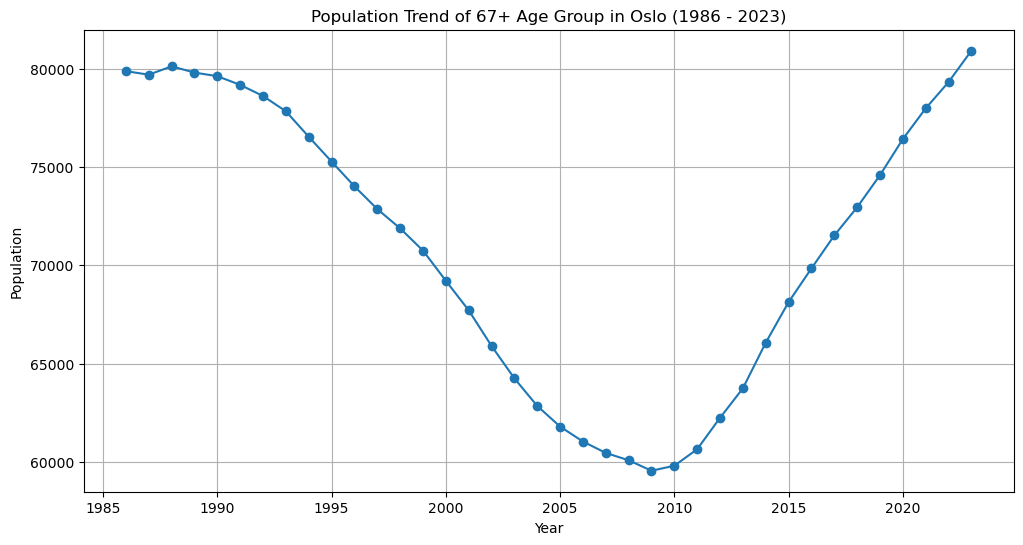

In [100]:


# Assuming 'df' is your DataFrame
# Filter data for the relevant age groups and the Oslo region
elderly_data_oslo = df[(df['region'] == 'K-0301 Oslo') & 
                       (df['alder'].isin(['67-79 år', '80-89 år', '90 år og eldre']))]

# Group by year, and sum the population
grouped_elderly_oslo = elderly_data_oslo.groupby('år')['Personer'].sum().reset_index()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(grouped_elderly_oslo['år'], grouped_elderly_oslo['Personer'], marker='o')
plt.title('Population Trend of 67+ Age Group in Oslo (1986 - 2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()


Plotting the elderly population for Oslo. The population is not linear, therefore using a linear regression model to create a prediction for the population in Oslo would not make sense. Instead we will be trying to use ARIMA

In [101]:

# [Assuming 'grouped_elderly_oslo' is your DataFrame with the population data]

# Convert the year to a datetime object and set it as the index
grouped_elderly_oslo['år'] = pd.to_datetime(grouped_elderly_oslo['år'], format='%Y')
grouped_elderly_oslo.set_index('år', inplace=True)

# Split the data into training set
train = grouped_elderly_oslo[grouped_elderly_oslo.index.year <= 2023]['Personer']

train_size = int(len(grouped_elderly_oslo) * 0.8)
test_size = len(grouped_elderly_oslo) - train_size
train, test = grouped_elderly_oslo[0:train_size], grouped_elderly_oslo[train_size:len(grouped_elderly_oslo)]

Preparing training and testing data for Oslo

In [102]:
# Fit the ARIMA model on the training data
arima_model = ARIMA(train, order=(1, 0, 0))  
arima_model_fit = arima_model.fit()

# Forecast using the ARIMA model
arima_forecast = arima_model_fit.forecast(steps=test_size)


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


No considerations were made for which values and order to use the parameters for ARIMA yet

In [103]:
# Prepare data for linear regression (year as feature and population as target)
X_train = train.index.year.values.reshape(-1, 1)
y_train = train['Personer'].values
X_test = test.index.year.values.reshape(-1, 1)
y_test = test['Personer'].values

# Fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions using the Linear Regression model
lin_reg_predictions = lin_reg.predict(X_test)


In [104]:
# Calculate MSE and R2 for ARIMA model
arima_mse = mean_squared_error(y_test, arima_forecast)
arima_r2 = r2_score(y_test, arima_forecast)

# Calculate MSE and R2 for Linear Regression model
lin_reg_mse = mean_squared_error(y_test, lin_reg_predictions)
lin_reg_r2 = r2_score(y_test, lin_reg_predictions)

# Print the evaluation metrics
print(f"ARIMA Model - MSE: {arima_mse}, R2: {arima_r2}")
print(f"Linear Regression Model - MSE: {lin_reg_mse}, R2: {lin_reg_r2}")


ARIMA Model - MSE: 65196806.79119509, R2: -3.9151647456862237
Linear Regression Model - MSE: 449351159.03534305, R2: -32.876428678437065


In order to gain knowledge about which model would fir the data better, we compare the mse and r2 score of each model. We see that both receive a pretty high mse score, but the r2 score of the arima model was less worse than the one for linear regression, indicating that it might perform better

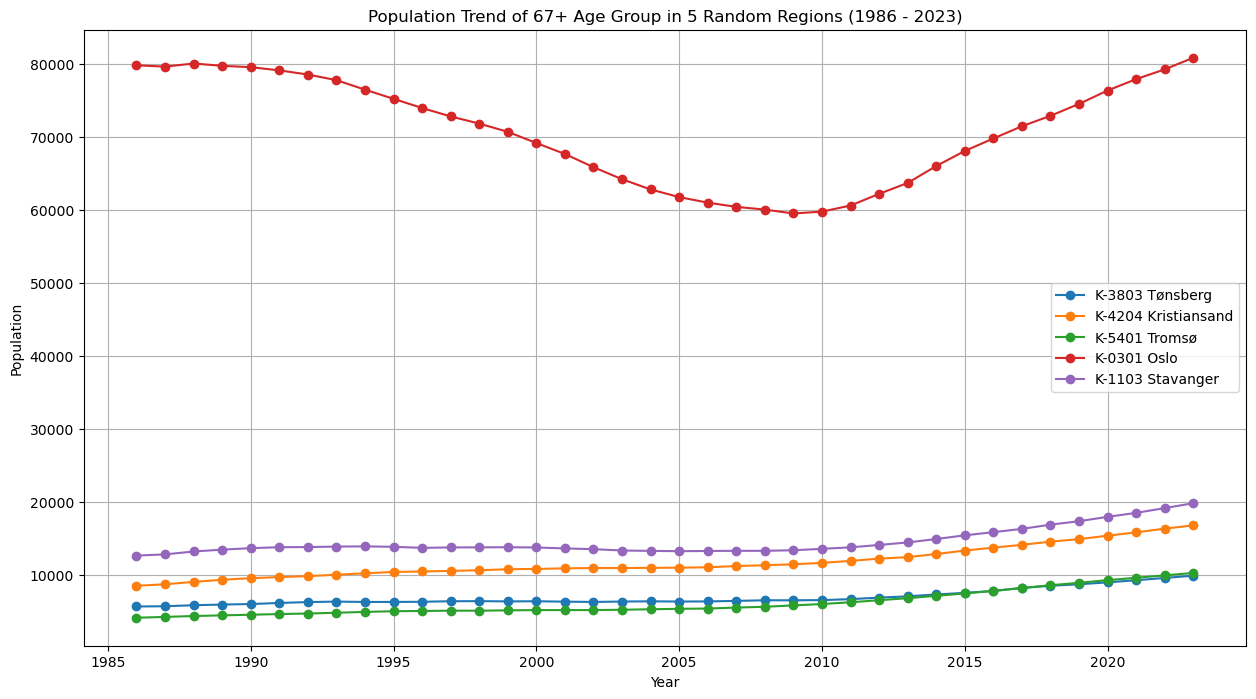

In [105]:
# Filter data for the relevant age groups across all regions
elderly_data = df[df['alder'].isin(['67-79 år', '80-89 år', '90 år og eldre'])]

# Select 5 random regions
random_regions = np.random.choice(elderly_data['region'].unique(), 5, replace=False)

# Set up the plot
plt.figure(figsize=(15, 8))

# Plotting the trend for each region
for region in random_regions:
    region_data = elderly_data[elderly_data['region'] == region]
    grouped_region_data = region_data.groupby('år')['Personer'].sum().reset_index()
    plt.plot(grouped_region_data['år'], grouped_region_data['Personer'], marker='o', label=region)

# Adding plot details
plt.title('Population Trend of 67+ Age Group in 5 Random Regions (1986 - 2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

Plotting more regions to see if they follow the same patten as Oslo. We see that the data is more 'stable' and much less varied than the one for Oslo, but perhaps not quite linear. Therefore, we will also try to use polynomial to see if that outperforms ARIMA and linear regression.

In [106]:
# Loop over each region
for region in grouped_elderly['region'].unique():
    print(f"Region: {region}")

    # Define the degree of the polynomial
    poly_degree = 2  

    for start_year in range(1986, 2010):  # Start years from 1991 to 2009
        # Filter data for training (from start_year to 2018)
        train_data = grouped_elderly[(grouped_elderly['region'] == region) & 
                                     (grouped_elderly['år'] >= start_year) & 
                                     (grouped_elderly['år'] < 2019)]
        X_train = train_data['år'].values.reshape(-1, 1)
        y_train = train_data['Personer'].values

        # Create a polynomial regression model
        model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
        model.fit(X_train, y_train)

        # Prepare test data (2019-2023)
        test_data = grouped_elderly[(grouped_elderly['region'] == region) & 
                                    (grouped_elderly['år'] >= 2019) & 
                                    (grouped_elderly['år'] <= 2023)]
        X_test = test_data['år'].values.reshape(-1, 1)
        y_test = test_data['Personer'].values

        # Predict and evaluate if test data is available
        if len(X_test) == len(y_test) and len(X_test) > 0:
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            print(f"\tStart Year {start_year} - MSE: {mse:.2f}, R2: {r2:.2f}")
        else:
            print(f"\tStart Year {start_year} - Insufficient data for evaluation")



Region: K-0301 Oslo
	Start Year 1986 - MSE: 40502236.98, R2: -7.34
	Start Year 1987 - MSE: 27327385.43, R2: -4.63
	Start Year 1988 - MSE: 16370110.88, R2: -2.37
	Start Year 1989 - MSE: 8791018.73, R2: -0.81
	Start Year 1990 - MSE: 3753463.96, R2: 0.23
	Start Year 1991 - MSE: 1390109.73, R2: 0.71
	Start Year 1992 - MSE: 1366740.93, R2: 0.72
	Start Year 1993 - MSE: 3316320.83, R2: 0.32
	Start Year 1994 - MSE: 6803854.51, R2: -0.40
	Start Year 1995 - MSE: 12037834.65, R2: -1.48
	Start Year 1996 - MSE: 19003274.14, R2: -2.91
	Start Year 1997 - MSE: 27596834.70, R2: -4.68
	Start Year 1998 - MSE: 37110325.39, R2: -6.64
	Start Year 1999 - MSE: 45575915.85, R2: -8.38
	Start Year 2000 - MSE: 51476118.00, R2: -9.60
	Start Year 2001 - MSE: 55259982.66, R2: -10.38
	Start Year 2002 - MSE: 55766445.18, R2: -10.48
	Start Year 2003 - MSE: 55113352.65, R2: -10.35
	Start Year 2004 - MSE: 53564082.83, R2: -10.03
	Start Year 2005 - MSE: 51065775.86, R2: -9.51
	Start Year 2006 - MSE: 46240211.76, R2: -8.52

Above displays the score of each polynomial model starting from a different year to determine which starting year would be idea. Additionally, 2nd degree was chosen

In [107]:

# Loop over each region
for region in grouped_elderly['region'].unique():
    print(f"Region: {region}")

    # Define the degree of the polynomial
    poly_degree = 3  

    for start_year in range(1986, 2010):  # Start years from 1991 to 2009
        # Filter data for training (from start_year to 2018)
        train_data = grouped_elderly[(grouped_elderly['region'] == region) & 
                                     (grouped_elderly['år'] >= start_year) & 
                                     (grouped_elderly['år'] < 2019)]
        X_train = train_data['år'].values.reshape(-1, 1)
        y_train = train_data['Personer'].values

        # Create a polynomial regression model
        model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
        model.fit(X_train, y_train)

        # Prepare test data (2019-2023)
        test_data = grouped_elderly[(grouped_elderly['region'] == region) & 
                                    (grouped_elderly['år'] >= 2019) & 
                                    (grouped_elderly['år'] <= 2023)]
        X_test = test_data['år'].values.reshape(-1, 1)
        y_test = test_data['Personer'].values

        # Predict and evaluate if test data is available
        if len(X_test) == len(y_test) and len(X_test) > 0:
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            print(f"\tStart Year {start_year} - MSE: {mse:.2f}, R2: {r2:.2f}")
        else:
            print(f"\tStart Year {start_year} - Insufficient data for evaluation")

Region: K-0301 Oslo
	Start Year 1986 - MSE: 152531200.73, R2: -30.41
	Start Year 1987 - MSE: 157904206.30, R2: -31.51
	Start Year 1988 - MSE: 157915864.05, R2: -31.52
	Start Year 1989 - MSE: 159267871.35, R2: -31.79
	Start Year 1990 - MSE: 156859261.64, R2: -31.30
	Start Year 1991 - MSE: 153726819.32, R2: -30.65
	Start Year 1992 - MSE: 149486879.87, R2: -29.78
	Start Year 1993 - MSE: 145264397.06, R2: -28.91
	Start Year 1994 - MSE: 141551817.84, R2: -28.15
	Start Year 1995 - MSE: 132606711.26, R2: -26.30
	Start Year 1996 - MSE: 118087978.27, R2: -23.31
	Start Year 1997 - MSE: 97811120.45, R2: -19.14
	Start Year 1998 - MSE: 74367260.37, R2: -14.31
	Start Year 1999 - MSE: 53595974.54, R2: -10.04
	Start Year 2000 - MSE: 37902706.78, R2: -6.80
	Start Year 2001 - MSE: 24852225.22, R2: -4.12
	Start Year 2002 - MSE: 16201500.97, R2: -2.34
	Start Year 2003 - MSE: 8348766.04, R2: -0.72
	Start Year 2004 - MSE: 2083045.40, R2: 0.57
	Start Year 2005 - MSE: 559387.02, R2: 0.88
	Start Year 2006 - MS

Above displays when we repeat the same actions as we have just done, but with a 3rd degree isntead

For the following code block, different starting years will be used to see how changing the starting years would affect the scores
* start (1986-2010)
* end (2018)
* to test for the best model, we try to predict 2019-2023 in order to predict 10 years ahead.

In [108]:
# Loop over each region
for region in grouped_elderly['region'].unique():
    print(f"Region: {region}")

    for start_year in range(1986, 2010):  # Start years from 1986 to 2010
        # Filter data for training (from start_year to 2019)
        train_data = grouped_elderly[(grouped_elderly['region'] == region) & 
                                     (grouped_elderly['år'] >= start_year) & 
                                     (grouped_elderly['år'] < 2019)]
        X_train = train_data['år'].values.reshape(-1, 1)
        y_train = train_data['Personer'].values

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Prepare test data (2019-2023)
        test_data = grouped_elderly[(grouped_elderly['region'] == region) & 
                                    (grouped_elderly['år'] >= 2019) & 
                                    (grouped_elderly['år'] <= 2023)]
        X_test = test_data['år'].values.reshape(-1, 1)
        y_test = test_data['Personer'].values

        # Predict and evaluate if test data is available
        if len(X_test) == len(y_test) and len(X_test) > 0:
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            print(f"\tStart Year {start_year} - MSE: {mse:.2f}, R2: {r2:.2f}")
        else:
            print(f"\tStart Year {start_year} - Insufficient data for evaluation")


Region: K-0301 Oslo
	Start Year 1986 - MSE: 352888531.97, R2: -71.66
	Start Year 1987 - MSE: 349229854.55, R2: -70.91
	Start Year 1988 - MSE: 343800658.61, R2: -69.79
	Start Year 1989 - MSE: 334342667.39, R2: -67.84
	Start Year 1990 - MSE: 322610839.88, R2: -65.43
	Start Year 1991 - MSE: 307809425.40, R2: -62.38
	Start Year 1992 - MSE: 290386876.52, R2: -58.79
	Start Year 1993 - MSE: 270450883.08, R2: -54.69
	Start Year 1994 - MSE: 248482480.08, R2: -50.16
	Start Year 1995 - MSE: 226149766.72, R2: -45.56
	Start Year 1996 - MSE: 203435064.07, R2: -40.89
	Start Year 1997 - MSE: 180434334.52, R2: -36.15
	Start Year 1998 - MSE: 156946276.06, R2: -31.32
	Start Year 1999 - MSE: 132544386.16, R2: -26.29
	Start Year 2000 - MSE: 107952519.68, R2: -21.23
	Start Year 2001 - MSE: 84857600.06, R2: -16.47
	Start Year 2002 - MSE: 63667085.93, R2: -12.11
	Start Year 2003 - MSE: 45787512.00, R2: -8.43
	Start Year 2004 - MSE: 31242584.03, R2: -5.43
	Start Year 2005 - MSE: 19841062.62, R2: -3.09
	Start Y

We see that the scores we receive are pretty bad overall, but a few good scores can be seen the more we delay the starting years. Not worth using a model which uses only a small subset of data if the scores are not up to par

It is plain to see that the scores of the ARIMA models are for the most part superior to both linear and polynomial regression. Some MSE scores are still fairly high, but looking back at the previous scores they are much less. The r2 scores are also improved

The following is ARIMA model with:
training set with starts from the beginning - 2018, then test is accuracy on the period 2019-2023

Arima parameters were tested at random. Multiple combinations were attempted, and (1,2,0) seemd to performed the best. Though, Moss and Ullensaker still received pretty bad scores.

In [109]:
# Loop over each region
for region in grouped_elderly['region'].unique():
    print(f"Region: {region}")

    # Filter data for training (up to 2018) and testing (2019-2023)
    train_data = grouped_elderly[(grouped_elderly['region'] == region) & (grouped_elderly['år'] < 2019)]
    test_data = grouped_elderly[(grouped_elderly['region'] == region) & (grouped_elderly['år'] >= 2019) & (grouped_elderly['år'] <= 2023)]

    # Prepare training and testing data
    y_train = train_data['Personer'].values
    y_test = test_data['Personer'].values
    test_years = pd.to_datetime(test_data['år'], format='%Y').dt.year  # corrected line

    # Fit the ARIMA model (order can be adjusted as needed)
    model = sm.tsa.ARIMA(y_train, order=(1, 2, 0))
    model_fit = model.fit()

    # Make predictions for 2019-2023
    start = len(y_train)
    end = start + len(y_test) - 1
    predictions = model_fit.predict(start=start, end=end, typ='levels')

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"\tARIMA Model - MSE: {mse:.2f}, R2: {r2:.2f}")


Region: K-0301 Oslo
	ARIMA Model - MSE: 346421.02, R2: 0.93
Region: K-1103 Stavanger
	ARIMA Model - MSE: 7732.61, R2: 0.99
Region: K-1106 Haugesund
	ARIMA Model - MSE: 721.78, R2: 0.99
Region: K-1506 Molde
	ARIMA Model - MSE: 2101.93, R2: 0.95
Region: K-1833 Rana
	ARIMA Model - MSE: 2491.73, R2: 0.88
Region: K-3002 Moss
	ARIMA Model - MSE: 74245.92, R2: 0.37
Region: K-3005 Drammen
	ARIMA Model - MSE: 13122.48, R2: 0.94
Region: K-3007 Ringerike
	ARIMA Model - MSE: 525.43, R2: 0.99
Region: K-3029 Lørenskog
	ARIMA Model - MSE: 13822.14, R2: 0.86
Region: K-3030 Lillestrøm
	ARIMA Model - MSE: 35327.03, R2: 0.75
Region: K-3033 Ullensaker
	ARIMA Model - MSE: 31598.84, R2: -0.01
Region: K-3407 Gjøvik
	ARIMA Model - MSE: 242.37, R2: 0.99
Region: K-3802 Holmestrand
	ARIMA Model - MSE: 1652.33, R2: 0.97
Region: K-3803 Tønsberg
	ARIMA Model - MSE: 33199.27, R2: 0.81
Region: K-3806 Porsgrunn
	ARIMA Model - MSE: 1635.57, R2: 0.97
Region: K-3807 Skien
	ARIMA Model - MSE: 13391.11, R2: 0.87
Region: K-

/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys([

Now, we can finally start creating our predictions for the elderly population by training the model with all data available (1986-2023). The predictions are then stored in a df

In [110]:


# Define the regions based on R2 score criteria
regions_to_forecast = [
    'K-1103 Stavanger', 'K-1106 Haugesund', 'K-1506 Molde', 'K-3007 Ringerike', 
    'K-3029 Lørenskog', 'K-3030 Lillestrøm',  'K-3407 Gjøvik', 
    'K-3802 Holmestrand', 'K-3803 Tønsberg', 'K-3806 Porsgrunn', 
    'K-3807 Skien', 'K-4204 Kristiansand', 'K-5401 Tromsø', 'K-0301 Oslo', 
    'K-5001 Trondheim - Tråante', 'K-4601 Bergen','K-3807 Skien','K-3005 Drammen','K-1833 Rana'
]

# Dictionary to store forecasts
forecasts_2023_to_2030 = {}

# Loop over each region and perform forecasting
for region in regions_to_forecast:
    print(f"Forecasting for Region: {region}")

    # Filter data for the current region
    region_data = grouped_elderly[grouped_elderly['region'] == region]

    # Prepare the data for ARIMA model
    y = region_data['Personer'].values
    dates = pd.to_datetime(region_data['år'], format='%Y')

    # Fit the ARIMA model (assuming order (1, 1, 0))
    model = sm.tsa.ARIMA(y, order=(1, 2, 0))
    model_fit = model.fit()

    # Forecasting from 2023 to 2030
    forecast_start_year = 2023
    forecast_end_year = 2030
    forecast_length = forecast_end_year - forecast_start_year + 1
    forecast_start_index = forecast_start_year - dates.iloc[0].year

    # Make predictions
    forecast = model_fit.predict(start=forecast_start_index, end=forecast_start_index + forecast_length - 1, typ='levels')

    # Generate dates for the forecast period
    forecast_dates = pd.date_range(start=pd.to_datetime(forecast_start_year, format='%Y'), 
                                   periods=forecast_length, 
                                   freq='Y')

    # Store the forecast in the dictionary
    forecasts_2023_to_2030[region] = {year.strftime('%Y'): value for year, value in zip(forecast_dates, forecast)}

# Print the forecasts
print("\nForecasts from 2024 to 2030:")
print(forecasts_2023_to_2030)


Forecasting for Region: K-1103 Stavanger
Forecasting for Region: K-1106 Haugesund
Forecasting for Region: K-1506 Molde
Forecasting for Region: K-3007 Ringerike
Forecasting for Region: K-3029 Lørenskog
Forecasting for Region: K-3030 Lillestrøm
Forecasting for Region: K-3407 Gjøvik
Forecasting for Region: K-3802 Holmestrand
Forecasting for Region: K-3803 Tønsberg
Forecasting for Region: K-3806 Porsgrunn
Forecasting for Region: K-3807 Skien
Forecasting for Region: K-4204 Kristiansand
Forecasting for Region: K-5401 Tromsø
Forecasting for Region: K-0301 Oslo
Forecasting for Region: K-5001 Trondheim - Tråante
Forecasting for Region: K-4601 Bergen
Forecasting for Region: K-3807 Skien
Forecasting for Region: K-3005 Drammen
Forecasting for Region: K-1833 Rana

Forecasts from 2024 to 2030:
{'K-1103 Stavanger': {'2023': 19762.646650600327, '2024': 20473.377548758992, '2025': 21138.614753831916, '2026': 21803.570158058927, '2027': 22468.6179384082, '2028': 23133.635437272915, '2029': 23798.6628626

/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys([

In [111]:
# Assuming forecasts_2023_to_2030 is defined and is a dictionary
# Example: forecasts_2023_to_2030 = {'Region1': {2023: 100, 2024: 110}, 'Region2': {2023: 120, 2024: 130}}

forecasts_df = pd.DataFrame(columns=['Region', 'Year', 'Forecast'])

# Populate the DataFrame
idx = 0
for region, yearly_forecasts in forecasts_2023_to_2030.items():
    for year, forecast in yearly_forecasts.items():
        forecasts_df.loc[idx] = [region, year, forecast]
        idx += 1

# Sort the DataFrame for better organization
forecasts_df = forecasts_df.sort_values(by=['Region', 'Year'])

# Save to CSV file
csv_filename = 'forecasts_2023_to_2030_v2.csv'
forecasts_df.to_csv(csv_filename, index=False)

print(f"Forecasts saved to {csv_filename}")


Forecasts saved to forecasts_2023_to_2030_v2.csv


The dataframe containing the predictions of the elderly population of different regions, are saved to a csv file

Find a good p.d.q for Moss to get better forecast then 1.2.0

In [112]:

regions_to_forecast = [
    'K-3002 Moss'
]

# Dictionary to store forecasts
forecasts_2024_to_2030 = {}

# Loop over each region and perform forecasting
for region in regions_to_forecast:
    print(f"Forecasting for Region: {region}")

    # Filter data for the current region
    region_data = grouped_elderly[grouped_elderly['region'] == region]

    # Prepare the data for ARIMA model
    y = region_data['Personer'].values
    dates = pd.to_datetime(region_data['år'], format='%Y')

    # Fit the ARIMA model (assuming order (1, 1, 2))
    model = sm.tsa.ARIMA(y, order=(1, 1, 2))
    model_fit = model.fit()

    # Forecasting from 2023 to 2030
    forecast_start_year = 2023
    forecast_end_year = 2030
    forecast_length = forecast_end_year - forecast_start_year + 1
    forecast_start_index = forecast_start_year - dates.iloc[0].year

    # Make predictions
    forecast = model_fit.predict(start=forecast_start_index, end=forecast_start_index + forecast_length - 1, typ='levels')

    # Generate dates for the forecast period
    forecast_dates = pd.date_range(start=pd.to_datetime(forecast_start_year, format='%Y'), 
                                   periods=forecast_length, 
                                   freq='Y')

    # Store the forecast in the dictionary
    forecasts_2024_to_2030[region] = {year.strftime('%Y'): value for year, value in zip(forecast_dates, forecast)}

# Print the forecasts
print("\nForecasts from 2024 to 2030:")
print(forecasts_2024_to_2030)


Forecasting for Region: K-3002 Moss

Forecasts from 2024 to 2030:
{'K-3002 Moss': {'2023': 9494.282749691627, '2024': 9780.834193934134, '2025': 10029.890201004699, '2026': 10263.949345673187, '2027': 10483.91466129564, '2028': 10690.634805237954, '2029': 10884.907333116296, '2030': 11067.481775879713}}


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


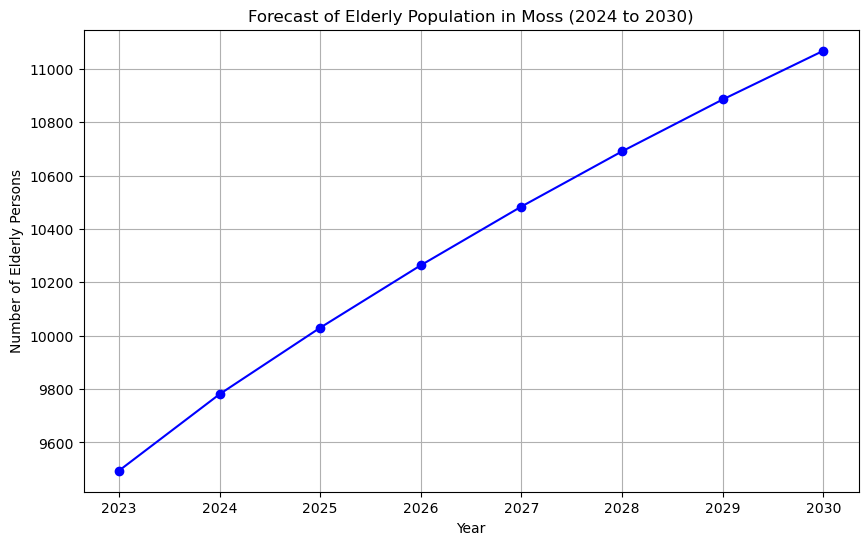

In [121]:
# Assuming forecasts_2024_to_2030 contains the forecasts
moss_forecast = forecasts_2024_to_2030['K-3002 Moss']

# Extract years and values for plotting
years = list(moss_forecast.keys())
values = list(moss_forecast.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o', linestyle='-', color='blue')

plt.title('Forecast of Elderly Population in Moss (2024 to 2030)')
plt.xlabel('Year')
plt.ylabel('Number of Elderly Persons')
plt.grid(True)
plt.show()

In [113]:
csv_filename = 'forecasts_2023_to_2030_v2.csv'
forecasts_df = pd.read_csv(csv_filename)

# Display the first few rows
print(forecasts_df.head())

        Region  Year      Forecast
0  K-0301 Oslo  2023  80667.637851
1  K-0301 Oslo  2024  82489.436117
2  K-0301 Oslo  2025  84068.935653
3  K-0301 Oslo  2026  85648.366916
4  K-0301 Oslo  2027  87227.802562


In [114]:
print("Keys in forecasts_2023_to_2030 dictionary:")
print(forecasts_2023_to_2030.keys())


Keys in forecasts_2023_to_2030 dictionary:
dict_keys(['K-1103 Stavanger', 'K-1106 Haugesund', 'K-1506 Molde', 'K-3007 Ringerike', 'K-3029 Lørenskog', 'K-3030 Lillestrøm', 'K-3407 Gjøvik', 'K-3802 Holmestrand', 'K-3803 Tønsberg', 'K-3806 Porsgrunn', 'K-3807 Skien', 'K-4204 Kristiansand', 'K-5401 Tromsø', 'K-0301 Oslo', 'K-5001 Trondheim - Tråante', 'K-4601 Bergen', 'K-3005 Drammen', 'K-1833 Rana'])


Add the Moss forecasts to the other prediction and makes a csv file.

In [115]:
new_forecasts = {
    'K-3002 Moss': {'2023': 9494.282797074, '2024': 9780.833352873922, '2025': 10029.888158752612, '2026': 10263.94612221314, '2027': 10483.91027856021, '2028': 10690.629286801253, '2029': 10884.900703916752, '2030': 11067.474061970288}
}


# Update the original forecasts dictionary with the new forecasts
forecasts_2023_to_2030.update(new_forecasts)

# Convert to DataFrame for exporting to CSV
df_forecasts = pd.DataFrame([(region, year, forecast) for region, yearly_forecasts in forecasts_2023_to_2030.items() for year, forecast in yearly_forecasts.items()], columns=['Region', 'Year', 'Forecast'])

# Save the updated forecasts to a CSV file
csv_filename_updated = 'updated_forecasts_2023_to_2030.csv'
df_forecasts.to_csv(csv_filename_updated, index=False)

print(f"Updated forecasts saved to {csv_filename_updated}")

Updated forecasts saved to updated_forecasts_2023_to_2030.csv


In [116]:
csv_filename_updated = 'updated_forecasts_2023_to_2030.csv'
updated_forecasts_df = pd.read_csv(csv_filename_updated)

# Display the unique regions in the dataset to confirm all are present
unique_regions = updated_forecasts_df['Region'].unique()
unique_regions.sort()
unique_regions

array(['K-0301 Oslo', 'K-1103 Stavanger', 'K-1106 Haugesund',
       'K-1506 Molde', 'K-1833 Rana', 'K-3002 Moss', 'K-3005 Drammen',
       'K-3007 Ringerike', 'K-3029 Lørenskog', 'K-3030 Lillestrøm',
       'K-3407 Gjøvik', 'K-3802 Holmestrand', 'K-3803 Tønsberg',
       'K-3806 Porsgrunn', 'K-3807 Skien', 'K-4204 Kristiansand',
       'K-4601 Bergen', 'K-5001 Trondheim - Tråante', 'K-5401 Tromsø'],
      dtype=object)

Start comparing our forecast with ssb forecast model which uses a lot of variabel. To get a sense of have good our predictions is. 

In [117]:


# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3803 Tønsberg"
arima_forecasts = forecasts_2023_to_2030.get('K-3005 Drammen', {})

# Extract MMM forecasts for "3803 Tønsberg" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '3005 Drammen']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (3005 Drammen):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")


Percentage Differences between ARIMA and MMM forecasts (3005 Drammen):
2023: -0.30%
2024: -0.03%
2025: 0.14%
2026: 0.17%
2027: 0.17%
2028: -0.04%
2029: -0.16%
2030: -0.48%


Drammen prediction is very close to ssb model which is a good sign.

In [118]:


# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3803 Tønsberg"
arima_forecasts = forecasts_2023_to_2030.get('K-1106 Haugesund', {})

# Extract MMM forecasts for "3803 Tønsberg" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '1106 Haugesund']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (1106 Haugesund):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")


Percentage Differences between ARIMA and MMM forecasts (1106 Haugesund):
2023: -0.01%
2024: 0.56%
2025: 0.48%
2026: 0.24%
2027: 0.38%
2028: 0.44%
2029: 0.78%
2030: 1.13%


Haguesund prediction is also very close to the sbb prediction. 

In [119]:


# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3803 Tønsberg"
arima_forecasts = forecasts_2023_to_2030.get('K-1103 Stavanger', {})

# Extract MMM forecasts for "3803 Tønsberg" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '1103 Stavanger']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (1103 Stavanger):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")



Percentage Differences between ARIMA and MMM forecasts (1103 Stavanger):
2023: -0.28%
2024: 0.35%
2025: 0.29%
2026: 0.24%
2027: 0.20%
2028: 0.04%
2029: -0.03%
2030: -0.24%


Stavanger prediction is also very close to our prediction

In [990]:


# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3803 Tønsberg"
arima_forecasts = forecasts_2023_to_2030.get('K-3002 Moss', {})

# Extract MMM forecasts for "3803 Tønsberg" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '3002 Moss']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")

Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):
2023: 0.12%
2024: 1.10%
2025: 1.35%
2026: 1.44%
2027: 1.02%
2028: 0.76%
2029: 0.48%
2030: -0.09%


In [120]:
# Assuming 'grouped_elderlyMMM' and 'forecasts_2023_to_2030' are defined

# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3803 Tønsberg"
arima_forecasts = forecasts_2023_to_2030.get('K-4601 Bergen', {})

# Extract MMM forecasts for "3803 Tønsberg" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '4601 Bergen']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (4601 Bergen):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")

Percentage Differences between ARIMA and MMM forecasts (4601 Bergen):
2023: -0.31%
2024: -0.87%
2025: -1.33%
2026: -1.91%
2027: -2.67%
2028: -3.15%
2029: -3.81%
2030: -4.52%


Bergen is a region that was quite far a part from the ssb prediction. Could be a sign that our prediction is a bit off.

In [992]:
# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-0301 Oslo"
arima_forecasts = forecasts_2023_to_2030.get('K-0301 Oslo', {})

# Extract MMM forecasts for "0301 Oslo" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '0301 Oslo']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (0301 Oslo):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")

Percentage Differences between ARIMA and MMM forecasts (0301 Oslo):
2023: -0.83%
2024: -1.25%
2025: -2.09%
2026: -2.98%
2027: -3.79%
2028: -4.73%
2029: -5.50%
2030: -6.32%


Here, we see than the further away we get from 2023, the more our prediction differs from SSB's prediction. Atleast that is the case for Oslo

In [993]:
# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3007 Ringerike"
arima_forecasts = forecasts_2023_to_2030.get('K-3007 Ringerike', {})

# Extract MMM forecasts for "3007 Ringerike" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '3007 Ringerike']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (3007 Ringerike):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")

Percentage Differences between ARIMA and MMM forecasts (3007 Ringerike):
2023: -0.22%
2024: 0.14%
2025: -0.08%
2026: 0.34%
2027: -0.05%
2028: 0.18%
2029: 0.50%
2030: 1.00%


However, for Ringerike we can see that we are very close to SSB's prediction which could be seen as an indicator that the models we have created are of decent quality 

In [994]:
unique_municipalities = grouped_elderlyMMM['Municipality'].unique()



Considerations for Long-Term Forecasting:
Short-Term vs. Long-Term Forecasting: A model that performs well in predicting the immediate next one or two years might not necessarily perform equally well in long-term forecasting (like up to 2030). This is because long-term forecasts are more susceptible to changes in trends, external factors, and other unforeseen variables.

Changing Dynamics Over Time: Demographic trends can change due to a variety of factors like policy changes, economic conditions, health trends, etc. A model trained on data up to 2022 might not capture these future changes effectively.

Data Availability and Model Complexity: More recent data might be more representative of current trends, but it also means less data is available for training, which can affect the model's ability to generalize. Complex models might capture more nuances but also risk overfitting to recent trends.


## Cobb-douglas function

Below contains the data for the workforce predictions we made

In [995]:
first_file_path = 'future_predictions_all_models.csv'
data_first= pd.read_csv(first_file_path)

# Display the first few rows of the dataframe
data_first.head()

,Region,Fagutdanning,Year,Predicted_Workforce
0,K.0301 Oslo,Helsefagarbeider,2023,2828.276373
1,K.0301 Oslo,Helsefagarbeider,2024,3010.821810
2,K.0301 Oslo,Helsefagarbeider,2025,3193.367246
3,K.0301 Oslo,Helsefagarbeider,2026,3375.912683
4,K.0301 Oslo,Helsefagarbeider,2027,3558.458119


Below contains the predictions for the elderly population

In [996]:
second_file_path = 'updated_forecasts_2023_to_2030.csv'
data_second = pd.read_csv(second_file_path)

# Display the first few rows of the dataframe
data_second.head()

,Region,Year,Forecast
0,K-1103 Stavanger,2023,19762.646650
1,K-1103 Stavanger,2024,20473.377549
2,K-1103 Stavanger,2025,21138.614754
3,K-1103 Stavanger,2026,21803.570158
4,K-1103 Stavanger,2027,22468.617938




In order to prepare the necessary data we are going to use for the Cobb-Douglas function, we are merging the preicted-workforce dataset with the predicted-elderly-population dataset into a single dataframe. Also, a new column is made with the logarithmic values of the elderly population and the workforce, which will be used in the function

In [997]:


import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the datasets
first_file_path = 'future_predictions_all_models.csv'
second_file_path = 'updated_forecasts_2023_to_2030.csv'
data_first = pd.read_csv(first_file_path)
data_second = pd.read_csv(second_file_path)

# Standardize region naming and correct mismatched region name in the second dataset
data_second['Region'] = data_second['Region'].str.replace('-', '.').str.strip()
data_second['Region'] = data_second['Region'].replace('K.5001 Trondheim . Tråante', 'K.5001 Trondheim - Tråante')

# Merging the datasets
merged_data = pd.merge(data_first, data_second, on=['Region', 'Year'])

# Filtering data
filtered_data = merged_data[merged_data['Fagutdanning'] != 'Omsorgsarbeider']
filtered_data = filtered_data[filtered_data['Predicted_Workforce'] > 0]
filtered_data = filtered_data[~((filtered_data['Region'] == 'K.3802 Holmestrand') & (filtered_data['Fagutdanning'] == 'Lege'))]

# Log transformation
filtered_data['Log_Predicted_Workforce'] = np.log(filtered_data['Predicted_Workforce'])
filtered_data['Log_Forecast'] = np.log(filtered_data['Forecast'])

# Rechecking the unique regions to ensure complete alignment
unique_regions_first_corrected = set(filtered_data['Region'].unique())
unique_regions_second_corrected = set(data_second['Region'].unique())
common_regions_corrected = unique_regions_first_corrected.intersection(unique_regions_second_corrected)

# Final alignment summary
alignment_summary_final = {
    "Unique Regions in Corrected Workforce Data": len(unique_regions_first_corrected),
    "Unique Regions in Corrected Forecast Data": len(unique_regions_second_corrected),
    "Common Regions After Final Correction": len(common_regions_corrected)
}

print(alignment_summary_final)




{'Unique Regions in Corrected Workforce Data': 19, 'Unique Regions in Corrected Forecast Data': 19, 'Common Regions After Final Correction': 19}


This is the Cobb-Douglas model

In [998]:

X = sm.add_constant(filtered_data['Log_Forecast'])

# Setting the dependent variable
y = filtered_data['Log_Predicted_Workforce']


# Performing the regression using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Display the regression summary
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     Log_Predicted_Workforce   R-squared:                       0.579
Model:                                 OLS   Adj. R-squared:                  0.578
Method:                      Least Squares   F-statistic:                     602.2
Date:                     Thu, 30 Nov 2023   Prob (F-statistic):           2.73e-84
Time:                             21:12:28   Log-Likelihood:                -448.50
No. Observations:                      440   AIC:                             901.0
Df Residuals:                          438   BIC:                             909.2
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

Based on the results of the summary, the r-squared result is above 0.5. This suggests that about 59% of the changes in the predicted workforce can be accounted for by the forecasted values. It also implies a meaningful connection between the two variables.





In [999]:
example_data = filtered_data[(filtered_data['Fagutdanning'] == 'Lege') & 
                             (filtered_data['Region'] == 'K.0301 Oslo')]

# Check if example_data is empty
if example_data.empty:
    print("No data available for Lege in K.0301 Oslo.")
else:
    # Proceed with regression analysis
    X = sm.add_constant(example_data['Log_Forecast'])
    y = example_data['Log_Predicted_Workforce']
    model = sm.OLS(y, X).fit()
    elasticity_coefficient = model.params['Log_Forecast']
    print(f"Elasticity Coefficient for Lege in K.0301 Oslo: {elasticity_coefficient}")


Elasticity Coefficient for Lege in K.0301 Oslo: 0.9697803986083642


Here, we are simply testing the calculation of the elasticity between oslo and lege.
The following code blocks contains the calculation the elasticity coefficient for lege, helsefagarbeider, and sykepleier across all municipalities we have a prediction of their workforce

In [1000]:
# Unique regions in the dataset
unique_regions = filtered_data['Region'].unique()

# Loop through each region and perform regression for 'Lege'
for region in unique_regions:
    # Filter data for 'Lege' in the current region
    lege_data = filtered_data[(filtered_data['Fagutdanning'] == 'Lege') & 
                              (filtered_data['Region'] == region)]

    # Check if there is data for 'Lege' in this region
    if not lege_data.empty:
        # Regression analysis
        X = sm.add_constant(lege_data['Log_Forecast'])  # Add a constant term for the intercept
        y = lege_data['Log_Predicted_Workforce']
        model = sm.OLS(y, X).fit()
        elasticity_coefficient = model.params['Log_Forecast']

        # Print the elasticity coefficient for 'Lege' in this region
        print(f"Elasticity Coefficient for Lege in {region}: {elasticity_coefficient:.4f}")
    else:
        # No data for 'Lege' in this region
        print(f"No data available for Lege in {region}.")

Elasticity Coefficient for Lege in K.0301 Oslo: 0.9698
Elasticity Coefficient for Lege in K.1103 Stavanger: 0.8087
Elasticity Coefficient for Lege in K.1106 Haugesund: 0.6666
Elasticity Coefficient for Lege in K.1506 Molde: 0.8233
No data available for Lege in K.1833 Rana.
Elasticity Coefficient for Lege in K.3002 Moss: 0.8175
Elasticity Coefficient for Lege in K.3005 Drammen: 1.3001
Elasticity Coefficient for Lege in K.3007 Ringerike: 1.0457
Elasticity Coefficient for Lege in K.3029 Lørenskog: 0.9794
Elasticity Coefficient for Lege in K.3030 Lillestrøm: 1.0120
Elasticity Coefficient for Lege in K.3407 Gjøvik: 1.2817
No data available for Lege in K.3802 Holmestrand.
Elasticity Coefficient for Lege in K.3803 Tønsberg: 0.6767
Elasticity Coefficient for Lege in K.3806 Porsgrunn: 0.8807
Elasticity Coefficient for Lege in K.3807 Skien: 0.9212
Elasticity Coefficient for Lege in K.4204 Kristiansand: 0.7769
Elasticity Coefficient for Lege in K.4601 Bergen: 1.4497
Elasticity Coefficient for Leg

In [1001]:
# Unique regions in the dataset
unique_regions = filtered_data['Region'].unique()

# Loop through each region and perform regression for 'Lege'
for region in unique_regions:
    # Filter data for 'Lege' in the current region
    lege_data = filtered_data[(filtered_data['Fagutdanning'] == 'Helsefagarbeider') & 
                              (filtered_data['Region'] == region)]

    # Check if there is data for 'Lege' in this region
    if not lege_data.empty:
        # Regression analysis
        X = sm.add_constant(lege_data['Log_Forecast'])  # Add a constant term for the intercept
        y = lege_data['Log_Predicted_Workforce']
        model = sm.OLS(y, X).fit()
        elasticity_coefficient = model.params['Log_Forecast']

        # Print the elasticity coefficient for 'Lege' in this region
        print(f"Elasticity Coefficient for Helsefagarbeider in {region}: {elasticity_coefficient:.4f}")
    else:
        # No data for 'Lege' in this region
        print(f"No data available for Helsefagarbeider in {region}.")

Elasticity Coefficient for Helsefagarbeider in K.0301 Oslo: 2.8658
Elasticity Coefficient for Helsefagarbeider in K.1103 Stavanger: 1.3205
Elasticity Coefficient for Helsefagarbeider in K.1106 Haugesund: 2.2736
Elasticity Coefficient for Helsefagarbeider in K.1506 Molde: 1.8918
Elasticity Coefficient for Helsefagarbeider in K.1833 Rana: 3.5105
Elasticity Coefficient for Helsefagarbeider in K.3002 Moss: 2.5460
Elasticity Coefficient for Helsefagarbeider in K.3005 Drammen: 2.5556
Elasticity Coefficient for Helsefagarbeider in K.3007 Ringerike: 2.3095
Elasticity Coefficient for Helsefagarbeider in K.3029 Lørenskog: 1.6176
Elasticity Coefficient for Helsefagarbeider in K.3030 Lillestrøm: 3.0758
Elasticity Coefficient for Helsefagarbeider in K.3407 Gjøvik: 4.4604
Elasticity Coefficient for Helsefagarbeider in K.3802 Holmestrand: 1.5726
Elasticity Coefficient for Helsefagarbeider in K.3803 Tønsberg: 2.1654
Elasticity Coefficient for Helsefagarbeider in K.3806 Porsgrunn: 3.2132
Elasticity Coe

In [1002]:

unique_regions = filtered_data['Region'].unique()

# Loop through each region and perform regression for 'Lege'
for region in unique_regions:
    # Filter data for 'Lege' in the current region
    lege_data = filtered_data[(filtered_data['Fagutdanning'] == 'Sykepleier') & 
                              (filtered_data['Region'] == region)]

    # Check if there is data for 'Lege' in this region
    if not lege_data.empty:
        # Regression analysis
        X = sm.add_constant(lege_data['Log_Forecast'])  # Add a constant term for the intercept
        y = lege_data['Log_Predicted_Workforce']
        model = sm.OLS(y, X).fit()
        elasticity_coefficient = model.params['Log_Forecast']

        # Print the elasticity coefficient for 'Lege' in this region
        print(f"Elasticity Coefficient for Sykepleier in {region}: {elasticity_coefficient:.4f}")
    else:
        # No data for 'Lege' in this region
        print(f"No data available for Sykepleier in {region}.")

Elasticity Coefficient for Sykepleier in K.0301 Oslo: 0.7000
Elasticity Coefficient for Sykepleier in K.1103 Stavanger: 0.5511
Elasticity Coefficient for Sykepleier in K.1106 Haugesund: 0.6075
Elasticity Coefficient for Sykepleier in K.1506 Molde: 0.3166
Elasticity Coefficient for Sykepleier in K.1833 Rana: 1.1970
Elasticity Coefficient for Sykepleier in K.3002 Moss: 0.4034
Elasticity Coefficient for Sykepleier in K.3005 Drammen: 1.0017
Elasticity Coefficient for Sykepleier in K.3007 Ringerike: 0.7226
Elasticity Coefficient for Sykepleier in K.3029 Lørenskog: 0.8091
Elasticity Coefficient for Sykepleier in K.3030 Lillestrøm: 1.4156
Elasticity Coefficient for Sykepleier in K.3407 Gjøvik: 1.0398
Elasticity Coefficient for Sykepleier in K.3802 Holmestrand: 0.5105
Elasticity Coefficient for Sykepleier in K.3803 Tønsberg: 0.4909
Elasticity Coefficient for Sykepleier in K.3806 Porsgrunn: 0.8188
Elasticity Coefficient for Sykepleier in K.3807 Skien: 0.6574
Elasticity Coefficient for Sykepleie

Now, we can calculate the actual demand for each individual profession, but first we are saving the multipliers needed to calculate the actual demand to a dataframe for later use

In [1003]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unique professions in the dataset
unique_professions = filtered_data['Fagutdanning'].unique()

# Store the results
multipliers = []

# Loop through each profession and each region
for profession in unique_professions:
    for region in unique_regions:
        # Filter data for the current profession and region
        profession_data = filtered_data[(filtered_data['Fagutdanning'] == profession) & 
                                        (filtered_data['Region'] == region)]

        if not profession_data.empty:
            # Regression analysis
            X = sm.add_constant(profession_data['Log_Forecast'])  # Add a constant term for the intercept
            y = profession_data['Log_Predicted_Workforce']
            model = sm.OLS(y, X).fit()
            elasticity_coefficient = model.params['Log_Forecast']

            # Calculate multiplier
            multiplier = 1 + elasticity_coefficient

            # Store the result
            multipliers.append({
                'Profession': profession,
                'Region': region,
                'Year': profession_data['Year'].unique(),
                'Multiplier': multiplier
            })

# Convert to a DataFrame for easier plotting
multipliers_df = pd.DataFrame(multipliers)


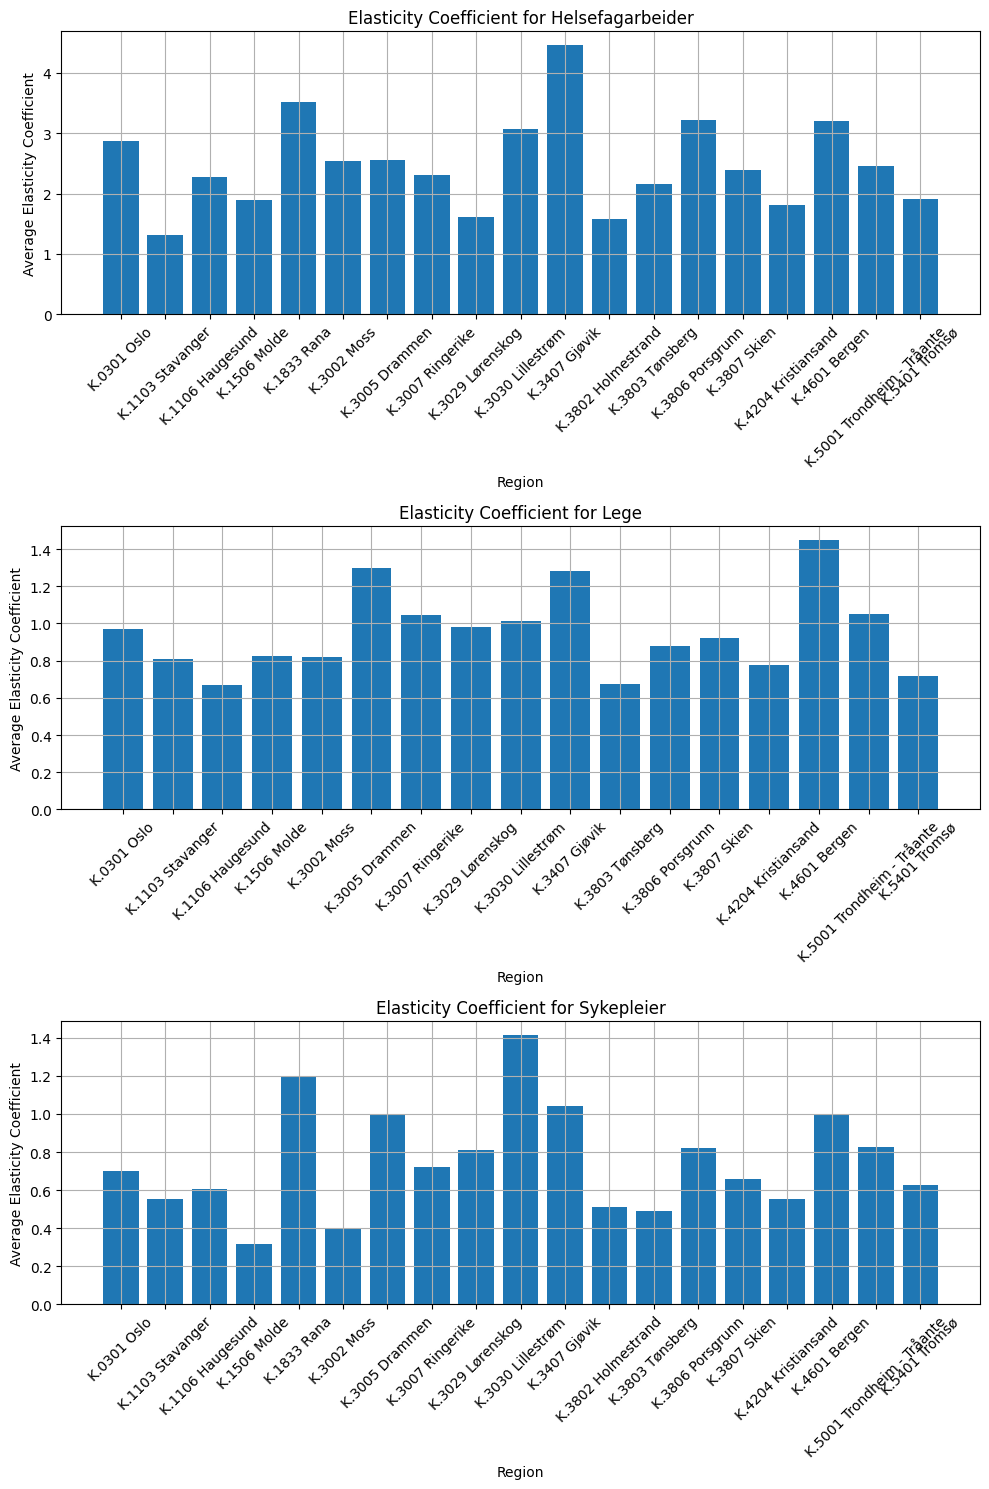

In [1004]:
# Unique professions
unique_professions = filtered_data['Fagutdanning'].unique()

# Set up the figure for multiple plots
num_professions = len(unique_professions)
fig, axes = plt.subplots(num_professions, 1, figsize=(10, 5 * num_professions), squeeze=False)

# Loop through each profession
for i, profession in enumerate(unique_professions):
    # Filter the data for the current profession
    profession_data = filtered_data[filtered_data['Fagutdanning'] == profession]

    # Unique regions for the current profession
    unique_regions = profession_data['Region'].unique()

    # Store average elasticity coefficients for each region
    avg_elasticity = []

    # Iterate over each region
    for region in unique_regions:
        region_data = profession_data[profession_data['Region'] == region]

        # Check if the region data is not empty
        if not region_data.empty:
            # Perform the regression for this region
            X = sm.add_constant(region_data['Log_Forecast'])
            y = region_data['Log_Predicted_Workforce']
            model = sm.OLS(y, X).fit()
            elasticity_coefficient = model.params['Log_Forecast']

            # Append the average elasticity coefficient
            avg_elasticity.append((region, elasticity_coefficient))

    # Convert to DataFrame for easier plotting
    elasticity_df = pd.DataFrame(avg_elasticity, columns=['Region', 'Elasticity'])

  

    # Plot the average elasticity coefficient for each region
    axes[i, 0].bar(elasticity_df['Region'], elasticity_df['Elasticity'])
    axes[i, 0].set_title(f'Elasticity Coefficient for {profession}')
    axes[i, 0].set_xlabel('Region')
    axes[i, 0].set_ylabel('Average Elasticity Coefficient')
    axes[i, 0].tick_params(axis='x', rotation=45)  # Rotate x-labels for better readability
    axes[i, 0].grid(True)

plt.tight_layout()
plt.show()

We can see that Helsefagarbeider has a much higher elasticity on average/ in general compared to the other professions. This can be explain by its rapid growth as of late since it a new profession. What we mean by that is helsefagarbeider has become an umbrella term for a lot of other professions like omsorgsarbeider and hjelpepleier. In other words, it is much bigger(higher demand) because SSB has not included all omsorgsarbeidere and hjelpepepleiere which could be titled as helsefargarbeider, only the ones receiving an education/ fagbrev as a helsefagarbeider. 

The following code block will contain the actual number of nurses required, or the demand of nurses.

In [1005]:
# Assuming 'filtered_data' is the merged and processed dataset
sykepleier_data = filtered_data[filtered_data['Fagutdanning'] == 'Sykepleier']

# Unique regions for the profession 'Sykepleier'
unique_regions_sykepleier = sykepleier_data['Region'].unique()

# Lists to store the assessment results
assessment_results = []

# Assess each region
for region in unique_regions_sykepleier:
    # Filter data for the current region
    region_data = sykepleier_data[sykepleier_data['Region'] == region]

    # Retrieve predicted number of nurses for 2030 and population for 2029 and 2030
    predicted_nurses_2030 = region_data[region_data['Year'] == 2030]['Predicted_Workforce'].values[0]
    current_population_2029 = region_data[region_data['Year'] == 2029]['Forecast'].values[0]
    predicted_population_2030 = region_data[region_data['Year'] == 2030]['Forecast'].values[0]

    # Elasticity coefficient (average for the region)
    X = sm.add_constant(region_data['Log_Forecast'])
    y = region_data['Log_Predicted_Workforce']
    model = sm.OLS(y, X).fit()
    elasticity_coefficient = model.params['Log_Forecast']

    # Calculate required increase in nurses
    population_growth_percentage = ((predicted_population_2030 - current_population_2029) / current_population_2029) * 100
    required_increase_percentage = population_growth_percentage * elasticity_coefficient
    required_nurses = predicted_nurses_2030 * (required_increase_percentage / 100)
    required_nurses_total = predicted_nurses_2030 * (1 + (required_increase_percentage / 100))

    # Store the results
    assessment_results.append({
        'Region': region,
        'Predicted Nurses (predval)': predicted_nurses_2030,
        'Additional Required Nurses': required_nurses,
        'Total Required Nurses (shouldval)': required_nurses_total,
        'Percentage Difference': (predicted_nurses_2030 - required_nurses_total) / required_nurses_total * 100,
        'Absolute Difference': predicted_nurses_2030 - required_nurses_total
    })

# Convert to DataFrame for easier review
assessment_df = pd.DataFrame(assessment_results)

# Display the results
print(assessment_df)


                        Region  Predicted Nurses (predval)   
0                  K.0301 Oslo                14200.317661  \
1             K.1103 Stavanger                 4053.781114   
2             K.1106 Haugesund                 1647.153102   
3                 K.1506 Molde                 1056.730541   
4                  K.1833 Rana                  671.638088   
5                  K.3002 Moss                  713.717503   
6               K.3005 Drammen                 2543.297511   
7             K.3007 Ringerike                  688.702094   
8             K.3029 Lørenskog                 3416.612406   
9            K.3030 Lillestrøm                  969.244567   
10               K.3407 Gjøvik                  994.641644   
11          K.3802 Holmestrand                  218.310944   
12             K.3803 Tønsberg                 2170.140063   
13            K.3806 Porsgrunn                  553.830897   
14                K.3807 Skien                 1793.570328   
15      

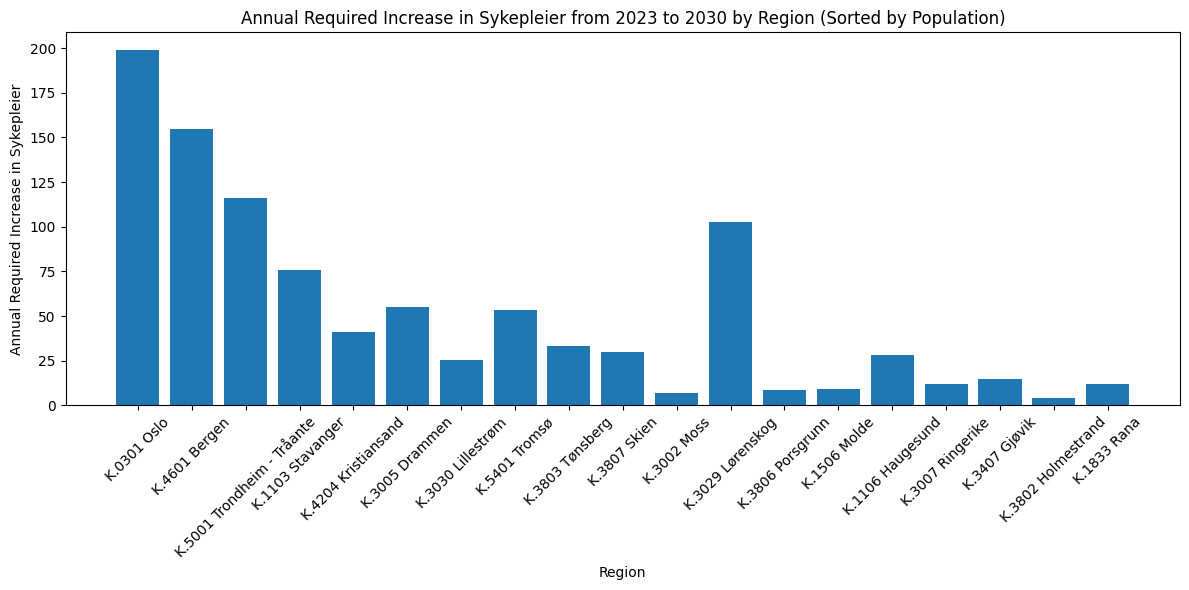

In [1006]:
# Assuming 'filtered_data' is the merged and processed dataset
sykepleier_data = filtered_data[filtered_data['Fagutdanning'] == 'Sykepleier']

# Lists to store the assessment results
assessment_results_sykepleier = []

# Assess each region
for region in sykepleier_data['Region'].unique():
    # Filter data for the current region
    region_data = sykepleier_data[sykepleier_data['Region'] == region]

    # Retrieve predicted number of 'Sykepleier' for 2030
    predicted_sykepleier_2030 = region_data[region_data['Year'] == 2030]['Predicted_Workforce'].values[0]

    # Retrieve population for 2023 and 2030
    current_population_2023 = region_data[region_data['Year'] == 2023]['Forecast'].values[0]
    predicted_population_2030 = region_data[region_data['Year'] == 2030]['Forecast'].values[0]

    # Elasticity coefficient calculation
    X = sm.add_constant(region_data['Log_Forecast'])
    y = region_data['Log_Predicted_Workforce']
    model = sm.OLS(y, X).fit()
    elasticity_coefficient = model.params['Log_Forecast']

    # Required increase calculation
    population_growth_percentage = ((predicted_population_2030 - current_population_2023) / current_population_2023) * 100
    required_increase_percentage = population_growth_percentage * elasticity_coefficient
    annual_increase_percentage = required_increase_percentage / (2030 - 2023)
    required_sykepleier_annual = predicted_sykepleier_2030 * (annual_increase_percentage / 100)

    # Store the results
    assessment_results_sykepleier.append({
        'Region': region,
        'Annual Required Increase': required_sykepleier_annual
    })

# Convert to DataFrame
assessment_df_sykepleier = pd.DataFrame(assessment_results_sykepleier)

# Extracting population data for 2030
population_2030 = sykepleier_data[sykepleier_data['Year'] == 2030][['Region', 'Forecast']].rename(columns={'Forecast': 'Population_2030'}).drop_duplicates()

# Merging with population data and sorting
assessment_df_sykepleier = assessment_df_sykepleier.merge(population_2030, on='Region')
assessment_df_sykepleier = assessment_df_sykepleier.sort_values('Population_2030', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(assessment_df_sykepleier['Region'], assessment_df_sykepleier['Annual Required Increase'])
plt.xlabel('Region')
plt.ylabel('Annual Required Increase in Sykepleier')
plt.title('Annual Required Increase in Sykepleier from 2023 to 2030 by Region (Sorted by Population)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

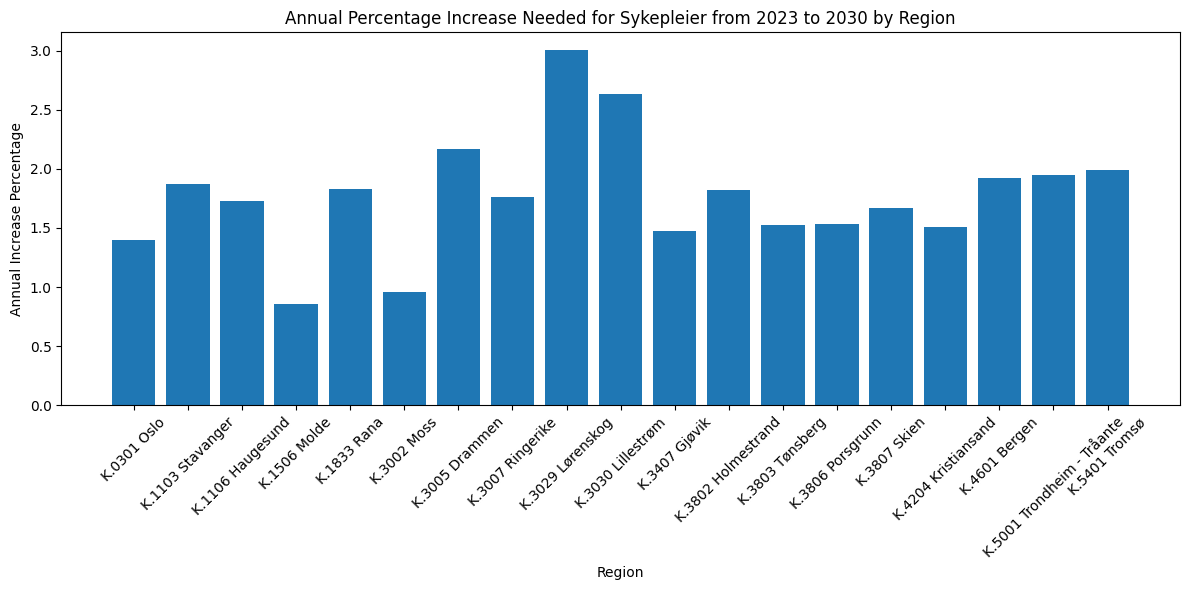

In [1007]:
# Assuming 'filtered_data' is the merged and processed dataset
sykepleier_data = filtered_data[filtered_data['Fagutdanning'] == 'Sykepleier']

# Lists to store the annual increase percentage results
annual_percentage_increase_results = []

# Assess each region
for region in sykepleier_data['Region'].unique():
    # Filter data for the current region
    region_data = sykepleier_data[sykepleier_data['Region'] == region]

    # Retrieve population for 2023 and 2030
    current_population_2023 = region_data[region_data['Year'] == 2023]['Forecast'].values[0]
    predicted_population_2030 = region_data[region_data['Year'] == 2030]['Forecast'].values[0]

    # Elasticity coefficient (average for the region)
    X = sm.add_constant(region_data['Log_Forecast'])
    y = region_data['Log_Predicted_Workforce']
    model = sm.OLS(y, X).fit()
    elasticity_coefficient = model.params['Log_Forecast']

    # Calculate the annual increase percentage needed
    population_growth_percentage = ((predicted_population_2030 - current_population_2023) / current_population_2023) * 100
    total_required_increase_percentage = population_growth_percentage * elasticity_coefficient
    annual_increase_percentage = total_required_increase_percentage / (2030 - 2023)

    # Store the results
    annual_percentage_increase_results.append({
        'Region': region,
        'Annual Increase Percentage': annual_increase_percentage
    })

# Convert to DataFrame for easier review
annual_percentage_increase_df = pd.DataFrame(annual_percentage_increase_results)

# Plotting the annual increase percentage
plt.figure(figsize=(12, 6))
plt.bar(annual_percentage_increase_df['Region'], annual_percentage_increase_df['Annual Increase Percentage'])
plt.xlabel('Region')
plt.ylabel('Annual Increase Percentage')
plt.title('Annual Percentage Increase Needed for Sykepleier from 2023 to 2030 by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1008]:
# Assuming 'filtered_data' is the merged and processed dataset
lege_data = filtered_data[filtered_data['Fagutdanning'] == 'Lege']

# Unique regions for the profession 'Lege'
unique_regions_lege = lege_data['Region'].unique()

# Lists to store the assessment results
assessment_results_lege = []

# Assess each region
for region in unique_regions_lege:
    # Filter data for the current region
    region_data = lege_data[lege_data['Region'] == region]

    # Retrieve predicted number of 'Lege' for 2030 and population for 2029 and 2030
    predicted_lege_2030 = region_data[region_data['Year'] == 2030]['Predicted_Workforce'].values[0]
    current_population_2029 = region_data[region_data['Year'] == 2029]['Forecast'].values[0]
    predicted_population_2030 = region_data[region_data['Year'] == 2030]['Forecast'].values[0]

    # Elasticity coefficient (average for the region)
    X = sm.add_constant(region_data['Log_Forecast'])
    y = region_data['Log_Predicted_Workforce']
    model = sm.OLS(y, X).fit()
    elasticity_coefficient = model.params['Log_Forecast']

    # Calculate required increase in 'Lege'
    population_growth_percentage = ((predicted_population_2030 - current_population_2029) / current_population_2029) * 100
    required_increase_percentage = population_growth_percentage * elasticity_coefficient
    required_lege = predicted_lege_2030 * (required_increase_percentage / 100)
    required_lege_total = predicted_lege_2030 * (1 + (required_increase_percentage / 100))

    # Store the results
    assessment_results_lege.append({
        'Region': region,
        'Predicted Lege (predval)': predicted_lege_2030,
        'Additional Required Lege': required_lege,
        'Total Required Lege (shouldval)': required_lege_total,
        'Percentage Difference': (predicted_lege_2030 - required_lege_total) / required_lege_total * 100,
        'Absolute Difference': predicted_lege_2030 - required_lege_total
    })

# Convert to DataFrame for easier review
assessment_df_lege = pd.DataFrame(assessment_results_lege)

# Display the results
print(assessment_df_lege)


                        Region  Predicted Lege (predval)   
0                  K.0301 Oslo               6040.199131  \
1             K.1103 Stavanger               1527.937574   
2             K.1106 Haugesund                460.314698   
3                 K.1506 Molde                358.159028   
4                  K.3002 Moss                185.619913   
5               K.3005 Drammen                977.008890   
6             K.3007 Ringerike                234.313315   
7             K.3029 Lørenskog               1615.203872   
8            K.3030 Lillestrøm                259.690043   
9                K.3407 Gjøvik                292.110628   
10             K.3803 Tønsberg                801.642434   
11            K.3806 Porsgrunn                133.828329   
12                K.3807 Skien                582.752667   
13         K.4204 Kristiansand                807.505729   
14               K.4601 Bergen               3058.480047   
15  K.5001 Trondheim - Tråante          

We look at how many nurses we predicted for 20230 with what it should have been following the current trend. Then we calculate how more nurses is required to follow the current trend in each region. 

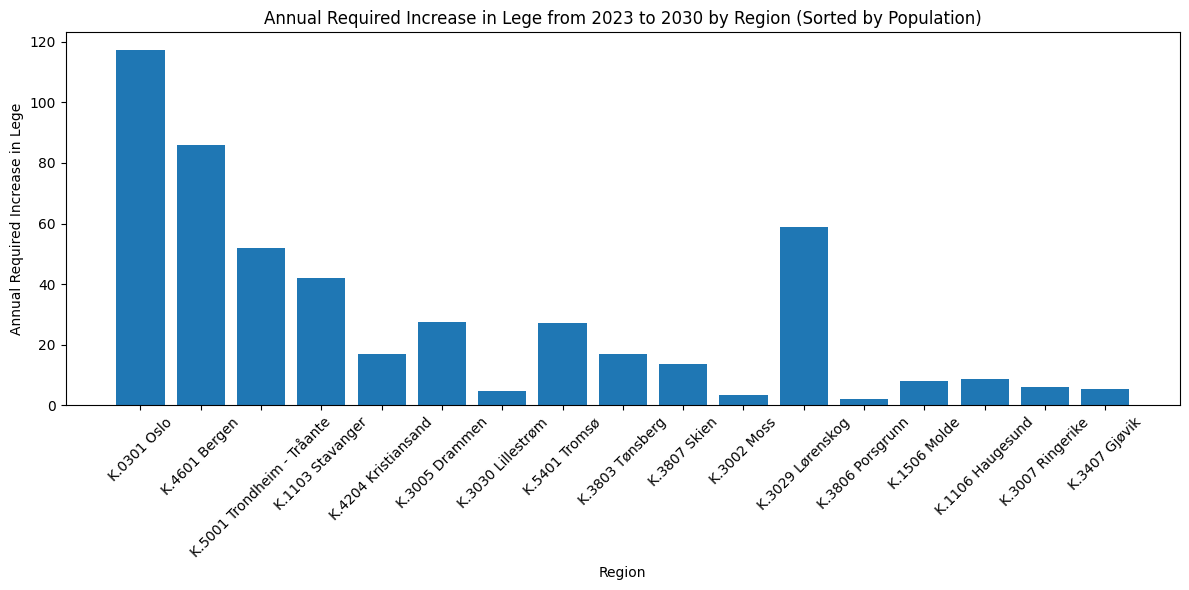

In [1009]:

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'filtered_data' is the merged and processed dataset
lege_data = filtered_data[filtered_data['Fagutdanning'] == 'Lege']

# Lists to store the assessment results
assessment_results_lege = []

# Assess each region
for region in lege_data['Region'].unique():
    # Filter data for the current region
    region_data = lege_data[lege_data['Region'] == region]

    # Retrieve predicted number of 'Lege' for 2030
    predicted_lege_2030 = region_data[region_data['Year'] == 2030]['Predicted_Workforce'].values[0]

    # Retrieve population for 2023 and 2030
    current_population_2023 = region_data[region_data['Year'] == 2023]['Forecast'].values[0]
    predicted_population_2030 = region_data[region_data['Year'] == 2030]['Forecast'].values[0]

    # Elasticity coefficient calculation
    X = sm.add_constant(region_data['Log_Forecast'])
    y = region_data['Log_Predicted_Workforce']
    model = sm.OLS(y, X).fit()
    elasticity_coefficient = model.params['Log_Forecast']

    # Required increase calculation
    population_growth_percentage = ((predicted_population_2030 - current_population_2023) / current_population_2023) * 100
    required_increase_percentage = population_growth_percentage * elasticity_coefficient
    annual_increase_percentage = required_increase_percentage / (2030 - 2023)
    required_lege_annual = predicted_lege_2030 * (annual_increase_percentage / 100)

    # Store the results
    assessment_results_lege.append({
        'Region': region,
        'Annual Required Increase': required_lege_annual
    })

# Convert to DataFrame
assessment_df_lege = pd.DataFrame(assessment_results_lege)

# Extracting population data for 2030
population_2030 = lege_data[lege_data['Year'] == 2030][['Region', 'Forecast']].rename(columns={'Forecast': 'Population_2030'}).drop_duplicates()

# Merging with population data and sorting
assessment_df_lege = assessment_df_lege.merge(population_2030, on='Region')
assessment_df_lege = assessment_df_lege.sort_values('Population_2030', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(assessment_df_lege['Region'], assessment_df_lege['Annual Required Increase'])
plt.xlabel('Region')
plt.ylabel('Annual Required Increase in Lege')
plt.title('Annual Required Increase in Lege from 2023 to 2030 by Region (Sorted by Population)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


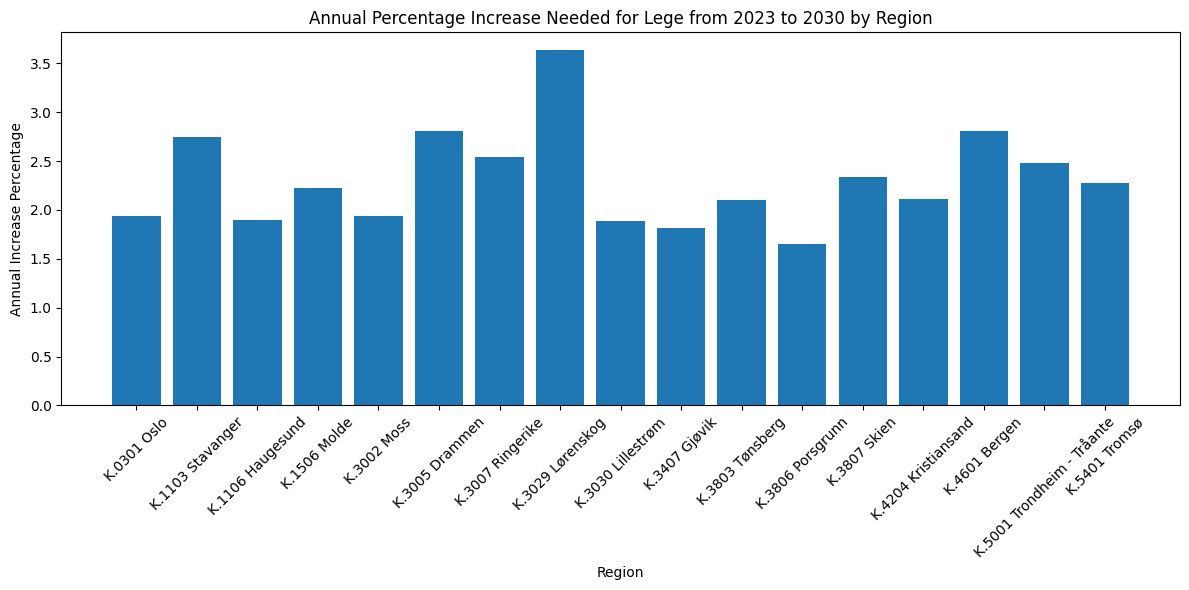

In [1010]:
import matplotlib.pyplot as plt

# Assuming 'filtered_data' is the merged and processed dataset
lege_data = filtered_data[filtered_data['Fagutdanning'] == 'Lege']

# Unique regions for the profession 'Lege'
unique_regions_lege = lege_data['Region'].unique()

# Lists to store the annual increase percentage results
annual_percentage_increase_results = []

# Assess each region
for region in unique_regions_lege:
    # Filter data for the current region
    region_data = lege_data[lege_data['Region'] == region]

    # Retrieve population for 2023 and 2030
    current_population_2023 = region_data[region_data['Year'] == 2023]['Forecast'].values[0]
    predicted_population_2030 = region_data[region_data['Year'] == 2030]['Forecast'].values[0]

    # Elasticity coefficient (average for the region)
    X = sm.add_constant(region_data['Log_Forecast'])
    y = region_data['Log_Predicted_Workforce']
    model = sm.OLS(y, X).fit()
    elasticity_coefficient = model.params['Log_Forecast']

    # Calculate the annual increase percentage needed
    population_growth_percentage = ((predicted_population_2030 - current_population_2023) / current_population_2023) * 100
    total_required_increase_percentage = population_growth_percentage * elasticity_coefficient
    annual_increase_percentage = total_required_increase_percentage / (2030 - 2023)

    # Store the results
    annual_percentage_increase_results.append({
        'Region': region,
        'Annual Increase Percentage': annual_increase_percentage
    })

# Convert to DataFrame for easier review
annual_percentage_increase_df = pd.DataFrame(annual_percentage_increase_results)

# Plotting the annual increase percentage
plt.figure(figsize=(12, 6))
plt.bar(annual_percentage_increase_df['Region'], annual_percentage_increase_df['Annual Increase Percentage'])
plt.xlabel('Region')
plt.ylabel('Annual Increase Percentage')
plt.title('Annual Percentage Increase Needed for Lege from 2023 to 2030 by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1011]:
# Assuming 'filtered_data' is the merged and processed dataset
helsefagarbeider_data = filtered_data[filtered_data['Fagutdanning'] == 'Helsefagarbeider']

# Unique regions for the profession 'Helsefagarbeider'
unique_regions_helsefagarbeider = helsefagarbeider_data['Region'].unique()

# Lists to store the assessment results
assessment_results_helsefagarbeider = []

# Assess each region
for region in unique_regions_helsefagarbeider:
    # Filter data for the current region
    region_data = helsefagarbeider_data[helsefagarbeider_data['Region'] == region]

    # Retrieve predicted number of 'Helsefagarbeider' for 2030 and population for 2029 and 2030
    predicted_helsefagarbeider_2030 = region_data[region_data['Year'] == 2030]['Predicted_Workforce'].values[0]
    current_population_2029 = region_data[region_data['Year'] == 2029]['Forecast'].values[0]
    predicted_population_2030 = region_data[region_data['Year'] == 2030]['Forecast'].values[0]

    # Elasticity coefficient (average for the region)
    X = sm.add_constant(region_data['Log_Forecast'])
    y = region_data['Log_Predicted_Workforce']
    model = sm.OLS(y, X).fit()
    elasticity_coefficient = model.params['Log_Forecast']

    # Calculate required increase in 'Helsefagarbeider'
    population_growth_percentage = ((predicted_population_2030 - current_population_2029) / current_population_2029) * 100
    required_increase_percentage = population_growth_percentage * elasticity_coefficient
    required_helsefagarbeider = predicted_helsefagarbeider_2030 * (required_increase_percentage / 100)
    required_helsefagarbeider_total = predicted_helsefagarbeider_2030 * (1 + (required_increase_percentage / 100))

    # Store the results
    assessment_results_helsefagarbeider.append({
        'Region': region,
        'Predicted Helsefagarbeider (predval)': predicted_helsefagarbeider_2030,
        'Additional Required Helsefagarbeider': required_helsefagarbeider,
        'Total Required Helsefagarbeider (shouldval)': required_helsefagarbeider_total,
        'Percentage Difference': (predicted_helsefagarbeider_2030 - required_helsefagarbeider_total) / required_helsefagarbeider_total * 100,
        'Absolute Difference': predicted_helsefagarbeider_2030 - required_helsefagarbeider_total
    })

# Convert to DataFrame for easier review
assessment_df_helsefagarbeider = pd.DataFrame(assessment_results_helsefagarbeider)

# Display the results
print(assessment_df_helsefagarbeider)


                        Region  Predicted Helsefagarbeider (predval)   
0                  K.0301 Oslo                           4106.094429  \
1             K.1103 Stavanger                           1439.640853   
2             K.1106 Haugesund                            424.614382   
3                 K.1506 Molde                            367.230739   
4                  K.1833 Rana                            406.736468   
5                  K.3002 Moss                            663.823390   
6               K.3005 Drammen                           1034.592058   
7             K.3007 Ringerike                            391.735678   
8             K.3029 Lørenskog                            334.999605   
9            K.3030 Lillestrøm                            720.938364   
10               K.3407 Gjøvik                            457.860134   
11          K.3802 Holmestrand                            245.735282   
12             K.3803 Tønsberg                            847.57

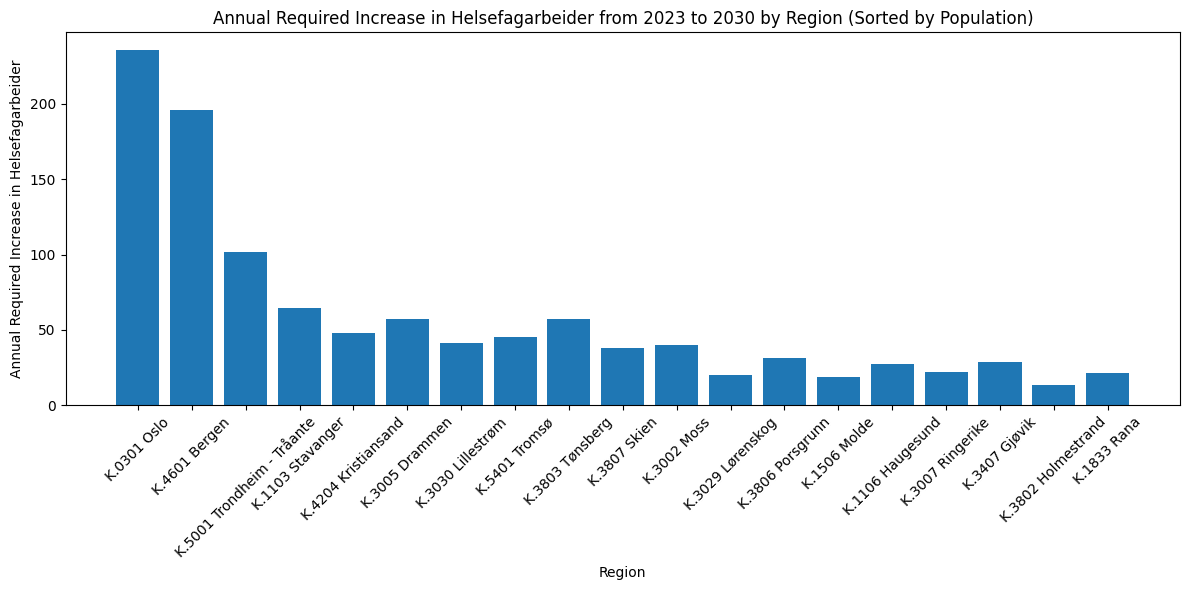

In [1012]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'filtered_data' is the merged and processed dataset
helsefagarbeider_data = filtered_data[filtered_data['Fagutdanning'] == 'Helsefagarbeider']

# Lists to store the assessment results
assessment_results_helsefagarbeider = []

# Assess each region
for region in helsefagarbeider_data['Region'].unique():
    # Filter data for the current region
    region_data = helsefagarbeider_data[helsefagarbeider_data['Region'] == region]

    # Retrieve predicted number of 'Helsefagarbeider' for 2030
    predicted_helsefagarbeider_2030 = region_data[region_data['Year'] == 2030]['Predicted_Workforce'].values[0]

    # Retrieve population for 2023 and 2030
    current_population_2023 = region_data[region_data['Year'] == 2023]['Forecast'].values[0]
    predicted_population_2030 = region_data[region_data['Year'] == 2030]['Forecast'].values[0]

    # Elasticity coefficient calculation
    X = sm.add_constant(region_data['Log_Forecast'])
    y = region_data['Log_Predicted_Workforce']
    model = sm.OLS(y, X).fit()
    elasticity_coefficient = model.params['Log_Forecast']

    # Required increase calculation
    population_growth_percentage = ((predicted_population_2030 - current_population_2023) / current_population_2023) * 100
    required_increase_percentage = population_growth_percentage * elasticity_coefficient
    annual_increase_percentage = required_increase_percentage / (2030 - 2023)
    required_helsefagarbeider_annual = predicted_helsefagarbeider_2030 * (annual_increase_percentage / 100)

    # Store the results
    assessment_results_helsefagarbeider.append({
        'Region': region,
        'Annual Required Increase': required_helsefagarbeider_annual
    })

# Convert to DataFrame
assessment_df_helsefagarbeider = pd.DataFrame(assessment_results_helsefagarbeider)

# Extracting population data for 2030
population_2030 = helsefagarbeider_data[helsefagarbeider_data['Year'] == 2030][['Region', 'Forecast']].rename(columns={'Forecast': 'Population_2030'}).drop_duplicates()

# Merging with population data and sorting
assessment_df_helsefagarbeider = assessment_df_helsefagarbeider.merge(population_2030, on='Region')
assessment_df_helsefagarbeider = assessment_df_helsefagarbeider.sort_values('Population_2030', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(assessment_df_helsefagarbeider['Region'], assessment_df_helsefagarbeider['Annual Required Increase'])
plt.xlabel('Region')
plt.ylabel('Annual Required Increase in Helsefagarbeider')
plt.title('Annual Required Increase in Helsefagarbeider from 2023 to 2030 by Region (Sorted by Population)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


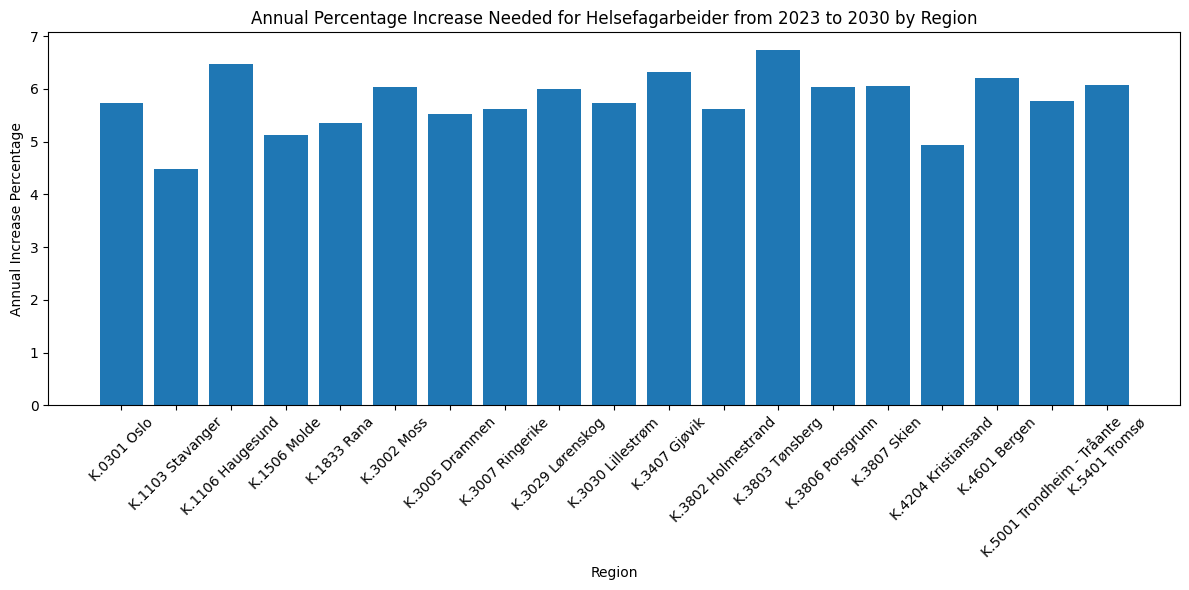

In [1013]:
import matplotlib.pyplot as plt

# Assuming 'filtered_data' is the merged and processed dataset
helsefagarbeider_data = filtered_data[filtered_data['Fagutdanning'] == 'Helsefagarbeider']

# Unique regions for the profession 'Helsefagarbeider'
unique_regions_helsefagarbeider = helsefagarbeider_data['Region'].unique()

# Lists to store the annual increase percentage results
annual_percentage_increase_results = []

# Assess each region
for region in unique_regions_helsefagarbeider:
    # Filter data for the current region
    region_data = helsefagarbeider_data[helsefagarbeider_data['Region'] == region]

    # Retrieve population for 2023 and 2030
    current_population_2023 = region_data[region_data['Year'] == 2023]['Forecast'].values[0]
    predicted_population_2030 = region_data[region_data['Year'] == 2030]['Forecast'].values[0]

    # Elasticity coefficient (average for the region)
    X = sm.add_constant(region_data['Log_Forecast'])
    y = region_data['Log_Predicted_Workforce']
    model = sm.OLS(y, X).fit()
    elasticity_coefficient = model.params['Log_Forecast']

    # Calculate the annual increase percentage needed
    population_growth_percentage = ((predicted_population_2030 - current_population_2023) / current_population_2023) * 100
    total_required_increase_percentage = population_growth_percentage * elasticity_coefficient
    annual_increase_percentage = total_required_increase_percentage / (2030 - 2023)

    # Store the results
    annual_percentage_increase_results.append({
        'Region': region,
        'Annual Increase Percentage': annual_increase_percentage
    })

# Convert to DataFrame for easier review
annual_percentage_increase_df = pd.DataFrame(annual_percentage_increase_results)

# Plotting the annual increase percentage
plt.figure(figsize=(12, 6))
plt.bar(annual_percentage_increase_df['Region'], annual_percentage_increase_df['Annual Increase Percentage'])
plt.xlabel('Region')
plt.ylabel('Annual Increase Percentage')
plt.title('Annual Percentage Increase Needed for Helsefagarbeider from 2023 to 2030 by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1014]:


# List of professions
professions = ['Sykepleier', 'Lege', 'Helsefagarbeider']

# Dictionary to store results for each profession
total_required_increase = {}

# Iterate through each profession
for profession in professions:
    profession_data = filtered_data[filtered_data['Fagutdanning'] == profession]
    profession_results = []

    # Assess each region
    for region in profession_data['Region'].unique():
        region_data = profession_data[profession_data['Region'] == region]

        # Retrieve predicted number for 2030 and population for 2023 and 2030
        predicted_2030 = region_data[region_data['Year'] == 2030]['Predicted_Workforce'].values[0]
        current_population_2023 = region_data[region_data['Year'] == 2023]['Forecast'].values[0]
        predicted_population_2030 = region_data[region_data['Year'] == 2030]['Forecast'].values[0]

        # Elasticity coefficient calculation
        X = sm.add_constant(np.log(region_data['Forecast']))
        y = np.log(region_data['Predicted_Workforce'])
        model = sm.OLS(y, X).fit()
        elasticity_coefficient = model.params[1]  # Coefficient for the log(Forecast)

        # Required increase calculation
        population_growth_percentage = ((predicted_population_2030 - current_population_2023) / current_population_2023) * 100
        required_increase_percentage = population_growth_percentage * elasticity_coefficient
        required_total = predicted_2030 * (1 + (required_increase_percentage / 100))

        # Store the results
        profession_results.append(required_total)

    # Summing up the results for the profession
    total_required_increase[profession] = sum(profession_results)

# Display the total required increase for each profession
print("Total Required Increase by 2030 for Each Profession:")
for profession, total in total_required_increase.items():
    print(f"{profession}: {total:.2f}")


Total Required Increase by 2030 for Each Profession:
Sykepleier: 61987.15
Lege: 24100.26
Helsefagarbeider: 26996.84


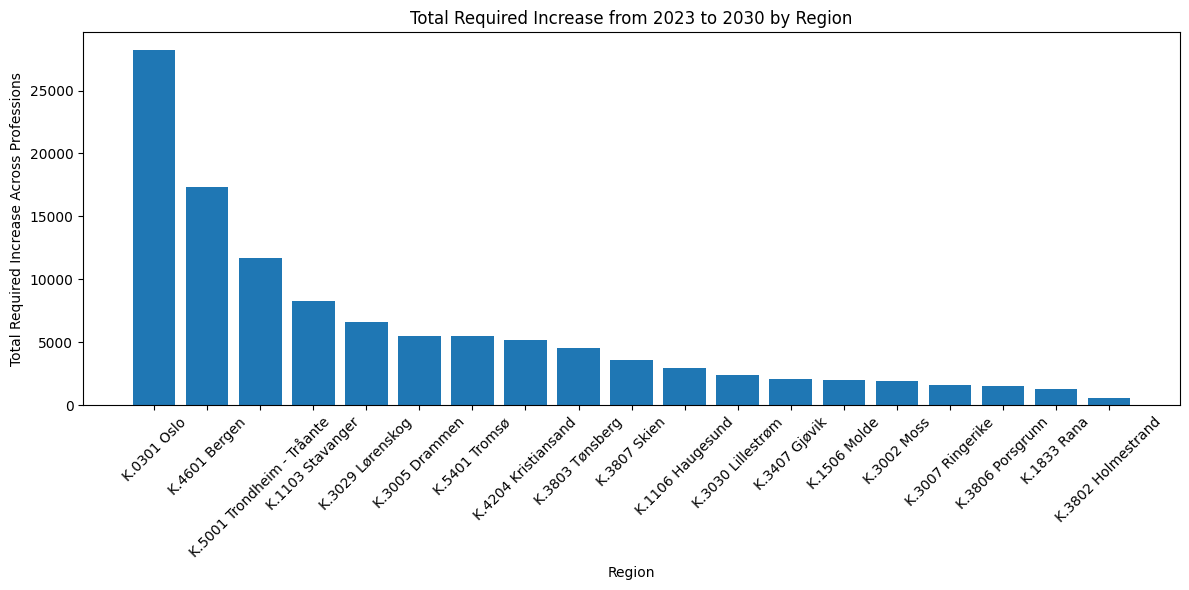

In [1015]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# List of professions
professions = ['Sykepleier', 'Lege', 'Helsefagarbeider']

# Get unique regions from the data
unique_regions = filtered_data['Region'].unique()

# Dictionary to store total required increases for each region
total_required_by_region = {}

# Iterate through each region
for region in unique_regions:
    total_required_for_region = 0

    # Analyze each profession within the region
    for profession in professions:
        profession_data = filtered_data[(filtered_data['Fagutdanning'] == profession) & (filtered_data['Region'] == region)]

        if not profession_data.empty:
            # Retrieve predicted number for 2030 and population for 2023 and 2030
            predicted_2030 = profession_data[profession_data['Year'] == 2030]['Predicted_Workforce'].values[0]
            current_population_2023 = profession_data[profession_data['Year'] == 2023]['Forecast'].values[0]
            predicted_population_2030 = profession_data[profession_data['Year'] == 2030]['Forecast'].values[0]

            # Elasticity coefficient calculation
            X = sm.add_constant(np.log(profession_data['Forecast']))
            y = np.log(profession_data['Predicted_Workforce'])
            model = sm.OLS(y, X).fit()
            elasticity_coefficient = model.params[1]  # Coefficient for the log(Forecast)

            # Required increase calculation
            population_growth_percentage = ((predicted_population_2030 - current_population_2023) / current_population_2023) * 100
            required_increase_percentage = population_growth_percentage * elasticity_coefficient
            required_total = predicted_2030 * (1 + (required_increase_percentage / 100))

            # Add to the total for the region
            total_required_for_region += required_total

    # Store the total required for the region
    total_required_by_region[region] = total_required_for_region

# Convert to DataFrame for easier review and plotting
total_required_df = pd.DataFrame(list(total_required_by_region.items()), columns=['Region', 'Total Required Increase'])

# Sorting the DataFrame by 'Total Required Increase' in descending order
total_required_df = total_required_df.sort_values(by='Total Required Increase', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(total_required_df['Region'], total_required_df['Total Required Increase'])
plt.xlabel('Region')
plt.ylabel('Total Required Increase Across Professions')
plt.title('Total Required Increase from 2023 to 2030 by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


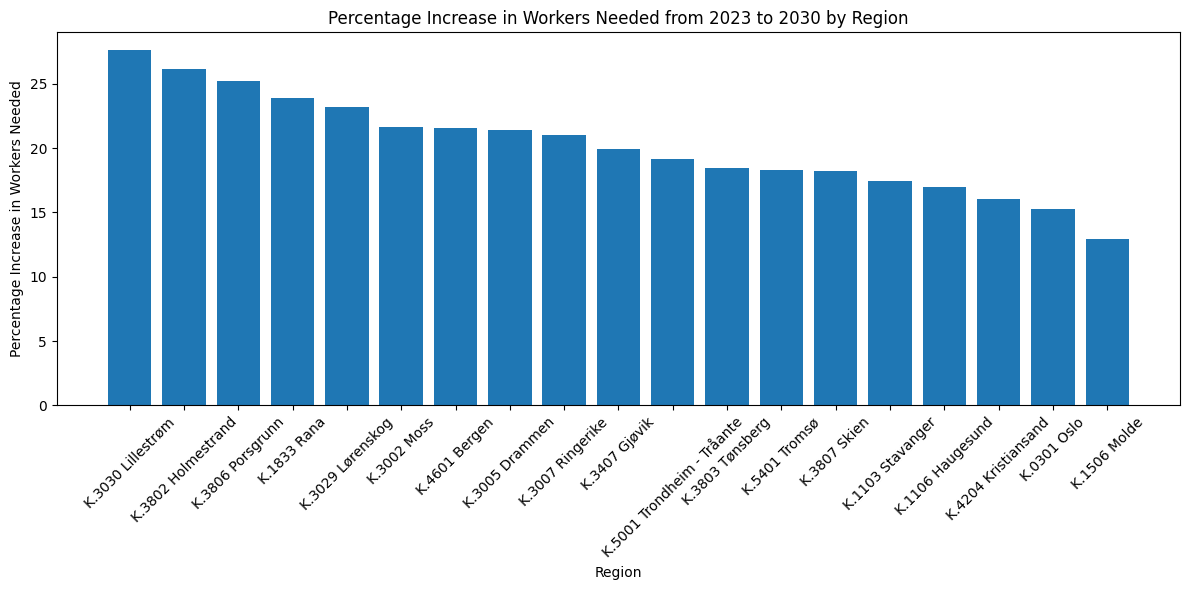

In [1016]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# List of professions
professions = ['Sykepleier', 'Lege', 'Helsefagarbeider']

# Get unique regions from the data
unique_regions = filtered_data['Region'].unique()

# Dictionary to store percentage increases for each region
percentage_increase_by_region = {}

# Iterate through each region
for region in unique_regions:
    total_predicted_2030 = 0
    total_current_2023 = 0

    # Analyze each profession within the region
    for profession in professions:
        profession_data = filtered_data[(filtered_data['Fagutdanning'] == profession) & (filtered_data['Region'] == region)]

        if not profession_data.empty:
            # Retrieve predicted number for 2030 and current number for 2023
            if 2030 in profession_data['Year'].values and 2023 in profession_data['Year'].values:
                predicted_2030 = profession_data[profession_data['Year'] == 2030]['Predicted_Workforce'].sum()
                current_2023 = profession_data[profession_data['Year'] == 2023]['Predicted_Workforce'].sum()
                
                # Add to the totals for the region
                total_predicted_2030 += predicted_2030
                total_current_2023 += current_2023

    # Calculate percentage increase if current workforce is not zero
    if total_current_2023 > 0:
        percentage_increase = ((total_predicted_2030 - total_current_2023) / total_current_2023) * 100
        percentage_increase_by_region[region] = percentage_increase

# Convert to DataFrame for easier review and plotting
percentage_increase_df = pd.DataFrame(list(percentage_increase_by_region.items()), columns=['Region', 'Percentage Increase'])

# Sorting the DataFrame by 'Percentage Increase' in descending order
percentage_increase_df = percentage_increase_df.sort_values(by='Percentage Increase', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(percentage_increase_df['Region'], percentage_increase_df['Percentage Increase'])
plt.xlabel('Region')
plt.ylabel('Percentage Increase in Workers Needed')
plt.title('Percentage Increase in Workers Needed from 2023 to 2030 by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
